-----

 # Préparation des modules  et Importation des données
-----

In [1]:
# Import des librairies de calcul:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

# Import des librairies de visualisation:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines #légende
import matplotlib.ticker as ticker #y axis format
import matplotlib.style as style #style de graphiques
from pylab import rcParams #changer taille de graphiques par défau

#Paramètres graphiques
plt.style.use('ggplot')
colors = ["#B0E0E6","#FFA07A","#20B2AA","#DB7093","#E9967A","#0abdc0"]
sns.color_palette("rocket")

# Import des donnees:
Transactions_df = pd.read_csv("transactions.csv")
Customers_df = pd.read_csv("customers.csv")
Products_df = pd.read_csv("products.csv")

In [2]:
#Visualisation rapide de nos 3 dataframes
print(Transactions_df.info())
print("----")
print(Customers_df.info())
print("----")
print(Products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB
None
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
None
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price

-----
# Outils (Fonction-Méthode) 
-----

In [3]:
def tauxDeRemplissage(dataframe):
    return ((dataframe.notna().sum()*100/dataframe.shape[0]).sort_values(ascending=False))

In [4]:
def Checkdoublon(dataframe):
    colonnes = dataframe.columns
    compteur = 0
    for colonne in colonnes:
        if dataframe[colonne].drop_duplicates().shape[0] == dataframe[colonne].shape[0]:
            print(f"La colonne {colonne} ne contient pas de doublons")
            compteur+=1
        else:
            print(f"La colonne {colonne} contient des doublons")
    if compteur == 0:
        print("Toutes les colonnes contiennent des doublons")

In [5]:
def partie_jour(value):
    if 14 <= value < 22:
        return 'Afternoon'
    elif 6 <= value < 14:
        return 'Morning'
    else:
        return 'Nigth'



-----
## 
# **MISSION O : Observation et nettoyage des Dataframes:**
-----

-----
## **1. Analyse des Dataframe**
-----

In [6]:
#Méthode .isnull() sur les données Manquantes, renvoi de booléens par colonne
print(Customers_df.isnull().any())
print("----")
print(Transactions_df.isnull().any())
print("----")
print(Products_df.isnull().any())

client_id    False
sex          False
birth        False
dtype: bool
----
id_prod       False
date          False
session_id    False
client_id     False
dtype: bool
----
id_prod    False
price      False
categ      False
dtype: bool


 #### On compte aucune valeurs manquantes parmis les 3 dataframes.

-----
# A) Analyse correctionnelle de Transactions_df
-----

In [7]:
# exploration des données Transactions_df
Transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [8]:
Transactions_df.describe(include='all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [9]:
tauxDeRemplissage(Transactions_df)

client_id     100.0
session_id    100.0
date          100.0
id_prod       100.0
dtype: float64

In [10]:
Checkdoublon(Transactions_df)

La colonne id_prod contient des doublons
La colonne date contient des doublons
La colonne session_id contient des doublons
La colonne client_id contient des doublons
Toutes les colonnes contiennent des doublons


In [11]:
## On affine notre obervation des doublons.
print(Transactions_df.duplicated().values.any())
print(Transactions_df.duplicated().sum())


True
126


In [12]:
# On check ces 126 lignes, qui s'avère être des lignes Test.
Transactions_df.loc[Transactions_df.duplicated(), :]

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [13]:
Transactions_df[Transactions_df['id_prod']=='T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


## Aucune valeurs nulles dans le Dataframe.

* Les sessions "test_2021*" ont toute la même id_prod et session_id (T_0 et s_0).

*  200 lignes Test munit de  l'id_prod T_0 ainsi que  les clients ct_1 et ct_0 appartiennent à aucune autres ligne de la table Transactions_df.


In [14]:
#Suppression des valeurs de Transactions test 
Transactions_df.drop(Transactions_df[(Transactions_df["id_prod"] == "T_0")].index, inplace=True)


In [15]:
Transaction_df=Transactions_df.drop(Transactions_df[(Transactions_df["date"] == "test_2021-03-01 02:30:02.237419")].index, inplace=True)
print(Transactions_df.describe(include="all"))

       id_prod                        date session_id client_id
count   679332                      679332     679332    679332
unique    3266                      679332     342315      8600
top      1_369  2021-05-19 15:11:25.486067   s_118668    c_1609
freq      2252                           1         14     25488


In [16]:
### formatage des dates 
Transactions_df["date"] = pd.to_datetime(Transactions_df["date"], yearfirst= True)

In [17]:
Transactions_df


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


# Transactions_df contient : 

*  679,332 lignes et 4 colonnes 

* Type de variables : Toutes qualitatives

> *La Variable id_prod contient  3,266 valeurs uniques, cela indique que des livres ont été vendu plusieurs fois au même client.


#### On Note  679332 session id contre  679532 auparavant. elles sont des valeurs uniques, une session pouvant être composée de plusieurs produits.

* 200 lignes de moins après netoyage des sessions tests. 

> Les Sessions "T_O" ont donc bien été suprimées de notre dataframe.


-----
#  Analyse correctionnelle de Customers_df:
-----

In [18]:
Customers_df

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [19]:
# Exploration des données Customers_df :
Customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [20]:
print(Customers_df.client_id.describe(), "\n")
print(Customers_df.sex.describe(),"\n")
print(Customers_df.birth.describe(),"\n")

count       8623
unique      8623
top       c_7722
freq           1
Name: client_id, dtype: object 

count     8623
unique       2
top          f
freq      4491
Name: sex, dtype: object 

count    8623.000000
mean     1978.280877
std        16.919535
min      1929.000000
25%      1966.000000
50%      1979.000000
75%      1992.000000
max      2004.000000
Name: birth, dtype: float64 



###### Toutes les années de naissances sont comprises entre 1929 et 2004.

In [21]:
Checkdoublon(Customers_df)

La colonne client_id ne contient pas de doublons
La colonne sex contient des doublons
La colonne birth contient des doublons


In [22]:
tauxDeRemplissage(Customers_df)

birth        100.0
sex          100.0
client_id    100.0
dtype: float64

In [23]:
Customers_df["age"]=2023-Customers_df.birth
print(Customers_df.age.describe(),"\n")

count    8623.000000
mean       44.719123
std        16.919535
min        19.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        94.000000
Name: age, dtype: float64 



Il n'y a aucun client mineur ou agé de plus de 100 ans.
Aucune valeur abberrante à observer sur  cette variable.
(min 19 ans  max = 94 ans)

In [24]:
# Suppression des clients tests:
Customers_df.drop(Customers_df[(Customers_df["client_id"] == "ct_0")].index, inplace=True)
Customers_df.drop(Customers_df[(Customers_df["client_id"] == "ct_1")].index, inplace=True)

In [25]:
# Ajout d'une colonne "age" aux clients:
from datetime import datetime
current_year = datetime.now().strftime('%Y')

Customers_df["age"] = int(current_year) - Customers_df["birth"]

In [26]:
# Verifications:
Customers_df.info()
Customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 0 to 8622
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
 3   age        8621 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 336.8+ KB


,birth,age
count,8621.000000,8621.000000
mean,1978.275606,43.724394
std,16.917958,16.917958
min,1929.000000,18.000000
25%,1966.000000,30.000000
50%,1979.000000,43.000000
75%,1992.000000,56.000000
max,2004.000000,93.000000


##### Apres nettoyage, il semblerait que  La moyenne d'age à première vue serait aux alentours de 43 ans. 
>  On a bien supprimé les deux client Test " ( "cto", "ct1" ) 

In [27]:
# recherche client_id anormales
Customers_df.sort_values(["client_id"], axis=0, ascending=True, inplace=True)
Customers_df.head(10)

,client_id,sex,birth,age
4299,c_1,m,1955,67
6894,c_10,m,1956,66
2137,c_100,m,1992,30
8472,c_1000,f,1966,56
3426,c_1001,m,1982,40
1591,c_1002,f,1982,40
6485,c_1003,m,1982,40
6306,c_1004,m,1973,49
708,c_1005,f,1941,81
8457,c_1006,m,1979,43


In [28]:
# on affiche la liste des clients inactifs .
# (Revient à selectionner les client qui existent dans le tableau customers sans apparaitre  dans le tableau transactions)
clients_inactifs=Customers_df[~Customers_df.client_id.isin(Transactions_df.client_id.unique().tolist())].copy()
clients_inactifs['age']=2023-clients_inactifs['birth']
print('Total nombre de cliets inactifs :', len(clients_inactifs))
clients_inactifs.sort_values(['age', 'sex'])

Total nombre de cliets inactifs : 21


,client_id,sex,birth,age
6208,c_5245,f,2004,19
6471,c_6735,m,2004,19
3721,c_6930,m,2004,19
6338,c_5223,m,2003,20
6112,c_6862,f,2002,21
801,c_8253,f,2001,22
7790,c_90,m,2001,22
3821,c_4358,m,1999,24
2734,c_4406,f,1998,25
2483,c_3789,f,1997,26


*Ci dessus, la liste non exhaustive des 21 clients_id qui  n'ont jamais about à un achat sur le site. 

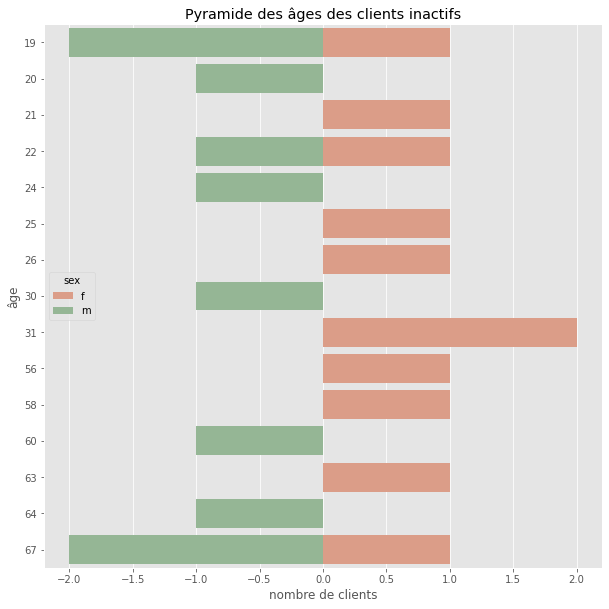

In [29]:
# affichage Graphique, Permet de  visualiser les âges et sexes des clients inactifs
cust_sex=clients_inactifs.groupby(['age', 'sex']).agg({'birth': 'count'}).rename(columns={'birth': 'nombre de clients'})
cust_sex.reset_index(inplace=True)
cust_sex.loc[cust_sex['sex']=='m', 'nombre de clients']=cust_sex.loc[cust_sex['sex']=='m', 'nombre de clients']*(-1)
plt.figure(figsize=(10,10))
sns.barplot(data=cust_sex, x='nombre de clients',y='age',
            hue='sex',orient='horizontal', palette=['#E9967A', '#8FBC8F'],
            dodge=False)
plt.ylabel('âge')
plt.title('Pyramide des âges des clients inactifs')
#plt.savefig('LaPage1.png', transparent=True)
plt.show()

**Ces  21 clients n'ont pas fait d'achats mais ont un compte sur notre site. On va les supprimer de notre echantillon.**
---- 
> Ces  clients n'ont jamais acheté de livres sur le site web. Ces clients sont d'âges différents, donc il est difficile de voir une tendance. 

In [30]:
# on supprime ces clients du tableau customers
Customers_final=Customers_df[Customers_df.client_id.isin(Transactions_df.client_id.unique().tolist())]

In [31]:
Customers_final.describe(include="all")

,client_id,sex,birth,age
count,8600,8600,8600.000000,8600.000000
unique,8600,2,NaN,NaN
top,c_6565,f,NaN,NaN
freq,1,4479,NaN,NaN
mean,NaN,NaN,1978.260698,43.739302
std,NaN,NaN,16.908755,16.908755
min,NaN,NaN,1929.000000,18.000000
25%,NaN,NaN,1966.000000,30.000000
50%,NaN,NaN,1979.000000,43.000000
75%,NaN,NaN,1992.000000,56.000000


## Après nettoyage de Customers_final on se retrouve avec
* --------> 8600 Client Id 
* 8,600 lignes et 4 colonnes

> Aucune anomalies client_id est à constater

 
 ##  Type de variables :
 
* ----> **Qualitatives** *(**client_id**  8,600 valeurs uniques, **sex** contient dans ce tableau: femme et homme

* ----> **Quantitative** ( **birth** : les client sont nés entre 1929 et 2004 âge : Les clients ont 19-94 ans en 2023)

**Analyse des valeurs manquantes:** aucune


---
# C) Analyse correctionnelle de Products_df:
---

In [32]:
Products_df

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [33]:
# exploration données
Products_df.info()
Products_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_91,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


> 
###### On observe un prix négatif a "-1" il doit d'agir d'une erreur . 

In [34]:
# on cherche les produits avec un prix anormal
Products_df[Products_df['price']<=0]


,id_prod,price,categ
731,T_0,-1.0,0


**Dans Transaction_df  on a supprimé les client en rapport avec ce que l'on suppose être un test**.

### Nous allons faire de même avec Product_df

In [35]:
# Suppression du produit test:
Products_df.drop(Products_df[(Products_df["id_prod"] == "T_0")].index, inplace=True)


In [36]:
# double Check méthode isna cette fois ci.
Products_df.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

> Deja vérfié précedemment pas de valeurs manquantes.

In [37]:
# Affichage des produits qui n'ont pas été vendu.
# On Selectionne les produits qui existent dans le tableau products, mais pas dans le tableau transactions.
produit_non_vendus=Products_df[~Products_df.id_prod.isin(Transactions_df.id_prod.unique().tolist())].copy()
print('Total nombre de produits que l\'on n\'achète jamais :', len(produit_non_vendus))
produit_non_vendus.sort_values('price')

Total nombre de produits que l'on n'achète jamais : 21


,id_prod,price,categ
1530,0_1620,0.80,0
811,0_1014,1.15,0
279,0_1780,1.67,0
2215,0_310,1.94,0
794,0_1119,2.99,0
1505,0_322,2.99,0
1347,0_1645,2.99,0
737,0_1062,20.08,0
3096,0_2308,20.28,0
1031,0_1318,20.92,0


In [38]:
produit_non_vendus.count()

id_prod    21
price      21
categ      21
dtype: int64

**On Observe  21 produits qui ne se sont jamais vendus mais qui sont pourtant référencé.**

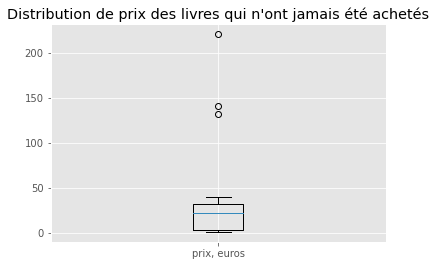

In [39]:
# Graphique de distribution des prix produits ( non vendu )
plt.boxplot(produit_non_vendus['price'])
plt.xticks([1], ['prix, euros'])
plt.title('Distribution de prix des livres qui n\'ont jamais été achetés')
plt.savefig('LaPage2.png', transparent=True)
plt.show()

In [40]:
# Suppression  des produits invendus  du tableau Product_final
Products_final=Products_df[Products_df.id_prod.isin(Transactions_df.id_prod.unique().tolist())]

In [41]:
# on fait l'imputations dans le tableau products pour le livre 0_2245 répéré plus tot.
Products_final = Products_final.append(dict(zip(Products_final.columns,['0_2245', np.median(Products_final[Products_final['categ']==0]['price']), 0])), ignore_index=True)

In [42]:
 # Verifications:
Products_final.info()
Products_final[["price"]].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266 entries, 0 to 3265
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3266 non-null   object 
 1   price    3266 non-null   float64
 2   categ    3266 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 76.7+ KB


,price
count,3266.000000
mean,21.757136
std,29.583978
min,0.620000
25%,6.990000
50%,13.035000
75%,22.990000
max,300.000000


#### Dans Products_df :

* On constate que le prix maximum égal à 300 euros.
* A contrario le prix minimum est quant à lui situé à 0,62 euros.

*(Pour Résumer)*
--
----

## Products_final contient 3,266 lignes et 4 colonnes 
___

> Le dataframe Products_df ne contient pas de valeurs manquantes, 
les données du dataframe sont exploitable car suffisament cohérentes.
___

## Type de variables: 


* -----> qualitative (id_prod), 



* ----->quantitatives (price, categ) 



* ----->Variable id_prod: 3,266 valeurs uniques 

___

### id_ prod fait office  potentiellement  de clé primaire.

____

In [43]:
# Verifications d'unicite et recherche de duplicats:
print("Nombre de client_id:", Customers_final["client_id"].nunique())
print("Nombre de id_prod:", Products_final["id_prod"].nunique())

Duplicated_df = Transactions_df.loc[Transactions_df.duplicated()==True]
Duplicated_df.info()

Nombre de client_id: 8600
Nombre de id_prod: 3266
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     0 non-null      object        
 1   date        0 non-null      datetime64[ns]
 2   session_id  0 non-null      object        
 3   client_id   0 non-null      object        
dtypes: datetime64[ns](1), object(3)
memory usage: 0.0+ bytes


* > client_id sera utilisée comme clé primaire pour Customers_df puisqu'il y a 8600 valeurs uniques.

* > id_prod  servira de clé primaire pour  Products_df puisqu'il y a 3266 valeurs uniques sur 3266 valeurs.
----

##### Pour faire les jointures et ce afin de  conserver toutes les informations présentes dans Transactions_df . Afin de  les lier à celles présentes dans les deux autres dataframes.
---

## -----> id_prod

# &

## -----> client_id 
----
>>offrent les conditions pour une relation de 1 à multiple avec Transactions_df.
----
### On opère une jointure full outer.
----

> Ainsi Les données clients n'achetant pas sur  plusieurs sessions seront préservées.

----
______
# D ) Jointure & Création du Dataframe C.A
----

In [44]:
# Premiere jointure:
Interm_df = pd.merge(Transactions_df, Customers_final, on="client_id", how="outer")
Interm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   age         679332 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 41.5+ MB


**679332 transactions répertoriées sont uniques**

In [45]:
# Seconde jointure:
Complet_df = pd.merge(Interm_df, Products_final, on="id_prod", how="outer")
Complet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   age         679332 non-null  int64         
 7   price       679332 non-null  float64       
 8   categ       679332 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 51.8+ MB


In [46]:
Complet_df.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
age           0
price         0
categ         0
dtype: int64

In [47]:
Complet_df['id_prod'].count()

679332

* Première jointure, de Customers_df sur Transactions_df. 

On obtient le **dataframe Interm_df avec 679332 lignes.**

* Seconde jointure, de Products_df sur Interm_df :
On obtient  **Complet_df compte 679332 lignes.**

 *NaN en nombre important:*

- On observe *221 NaN* dans les colonne **price** et **categ**

* Ils correspondent tous à différentes sessions de différents clients concernant le produit 0_2245 lié à la table Products_df. 


In [48]:
# Remplacement des donnees manquantes pour  référence produit : 0_2245:
# Pour que les  calculs soient moins approximatif, on impute par la médiane des prix des livres de catégorie 0 (9,99€) moins sensible aux outliers que la moyenne.
Complet_df["categ"] = np.where(Complet_df["id_prod"] == "0_2245",
                               0,
                               Complet_df["categ"])

Complet_df["price"] = np.where(Complet_df["id_prod"] == "0_2245",
                               Complet_df.loc[(Complet_df["categ"]==0),"price"].median(),
                               Complet_df["price"])

Complet_df.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
age           0
price         0
categ         0
dtype: int64

In [49]:
# Creation de Ventes_df:
Ventes_df = Complet_df.dropna()
Ventes_df.info(all)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   age         679332 non-null  int64         
 7   price       679332 non-null  float64       
 8   categ       679332 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 51.8+ MB


In [50]:
# Facilite la manipulation des dates:
Ventes_df["year"] = Ventes_df["date"].dt.year
Ventes_df["month"] = Ventes_df["date"].dt.month
Ventes_df["day"] = Ventes_df["date"].dt.day

_______

> **Ventes_df**  sera utilisé pour la suite de nos analyse  
------ 

## Ventes_df contient:

* 679,332 livres vendus
* 3,266 livres vendus uniques
* 8,600 clients ayant acheté quelque chose depuis 2 ans uniques 


> Dans le tableau products seulement 2 colonnes: avec pour variables quantitatives (price, categ). 
La variable id_prod sera utilisée comme l'index.

-------

> Pour Résumer nos 3 dataframes.

### On a PRICE,  Variable quantitative :

> * Les prix produits "price"

###  Variables qualitatives :

> * Les id (client_id, id_prod, session_id)
---
> * Les dates de transactions (De 2021-03-01 à 2022-02-28)
----
> * Sexe clients ( M ou F)
---- 
> * Les catégories produits (0, 1 ou 2)
____ 


------
# Mission 1 Antoine  : 
### Analyse des indicateurs du Chiffre d'Affaires.

-------
____

> afin de mieux comprendre les ventes, **l'analyse portera principalement sur les dimensions suivantes :**  
____
____
----
####   1) Évolution des ventes (Chiffre d'Affaires)
----
____
####   2) L'Analyse des prix produits
----
____
####   3) L'Analyse de la répartition par catégorie.
____
----
####   4) Analyse du comportement client.
____
----
####   5) Analyse de la répartition démographique
----
____

-----
_____

# 1) Évolution des ventes, Chiffre d'Affaires.
-----
_____

In [51]:
# CA total:
ca_tot = Ventes_df.loc[(Complet_df["client_id"] != "NaN"),"price"].sum()
ventes_tot = Ventes_df["session_id"].count()

print("Le chiffre d'affaires total est de", ca_tot, "€")
print("pour un total de", ventes_tot, "ventes.")

Le chiffre d'affaires total est de 11855936.469999999 €
pour un total de 679332 ventes.


In [52]:
# CA annuel:
ca_annuel = Ventes_df.groupby(["year"])["price"].sum()
print("Chiffre d'affaires annuels:\n", ca_annuel)

# Nombre de ventes annuel:
ventes_annuelles = Ventes_df.groupby(["year"])["session_id"].count()
print("Nombre de ventes annuelles:\n", ventes_annuelles)

Chiffre d'affaires annuels:
 year
2021    4.771696e+06
2022    6.109881e+06
2023    9.743602e+05
Name: price, dtype: float64
Nombre de ventes annuelles:
 year
2021    278335
2022    346500
2023     54497
Name: session_id, dtype: int64


In [53]:
# On check les dernières transactions passés
print(Complet_df["date"].nlargest(5))

356690   2023-02-28 23:58:30.792755
3230     2023-02-28 23:58:00.107815
225071   2023-02-28 23:53:18.929676
271337   2023-02-28 23:51:29.318531
510204   2023-02-28 23:49:03.148402
Name: date, dtype: datetime64[ns]


>Notre base de donnée contient des données à l'horizon Février 2023. Il s'agirait de savoir si il s'agit ici  de données prédictives concernant  des contrats déjà passé pour cette période ou non. 

In [54]:
Ventes_df['client_id'].value_counts().head(10)
# c_1609 + c_6714 + c_3454 + c_4958 = outliers = mise de coté pour la suite

c_1609    25488
c_6714     9187
c_3454     6773
c_4958     5195
c_3263      403
c_2140      402
c_2595      398
c_2077      384
c_1637      380
c_7421      379
Name: client_id, dtype: int64

identitfcation des  professionelles ( c_1609 ;c_6714; c_4958;c_3454 )


In [55]:
# calcul réprésentation clients pro dans CA
list_pro = ("c_1609", "12855" , "c_6714" , "c_3454",  "c_4958")

client_pro = Ventes_df.loc[Ventes_df["client_id"].isin(list_pro)] 
print(client_pro.price.sum())
print((client_pro.price.sum())/(Ventes_df.price.sum()))

881120.4500000001
0.07431892472008161


 **Les clients pro** représentent **881120.45 € du panier global** soit **7% du CA**

Text(0.5, 1.0, "Evolution mensuelle du chiffre d'affaires")

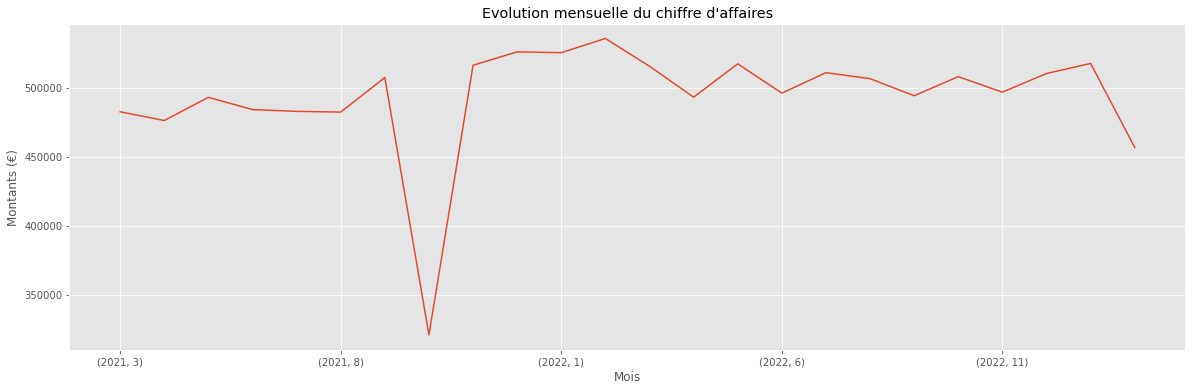

In [56]:
# CA mensuel:
Ventes_df = Ventes_df.sort_values(["date"],ascending=True)
ca_mensu = Ventes_df.groupby(["year","month"])["price"].sum()

# Nombre de ventes mensuelles:
ventes_mensu = Ventes_df.groupby(["year", "month"])["session_id"].count()

# Graphique:
plt.figure(figsize = (20,6))
ca_mensu.plot()
plt.xlabel("Mois")
plt.ylabel("Montants (€)")
plt.title("Evolution mensuelle du chiffre d'affaires")

> * On observe que les ventes de livres de catégorie 1 on subit une forte baisse au mois d'octobre 2021. Cette baisse ne se retrouve pas ensuite.
> * Possible problème de lecture de données ou une perte de traçabilité du trafic de vente en input sur cette periode.

In [57]:
# Calcul du CA par année
Ventes_df.groupby('year')['price'].sum()

year
2021    4.771696e+06
2022    6.109881e+06
2023    9.743602e+05
Name: price, dtype: float64

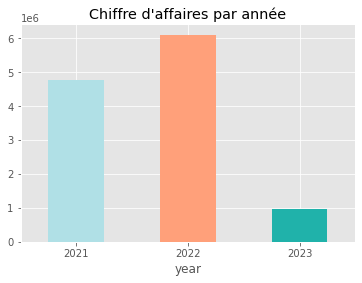

In [58]:
Ventes_df.groupby('year')['price'].sum().plot(kind = 'bar',color=colors)
plt.title('Chiffre d\'affaires par année')
plt.xticks(rotation=0, ha='center')
plt.show()

En **2022 le chiffre d'affaires, ainsi que le  nombre de ventes à  augmenté.**

> A  ce stade l'analyse des données est  incomplète.

>Il nous faut comparer mensuellement les années précédentes.


In [59]:
# Voyons l'évolution du CA par catégorie, au sein d'un tableau.
group_cat_month=Ventes_df.pivot_table('price', index=['year', 'month'], columns='categ', aggfunc='sum')
display(group_cat_month.style.format("{:,.2f}"))

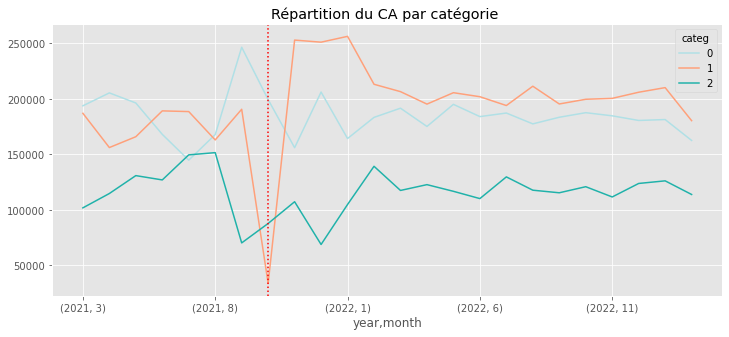

In [60]:
group_cat_month.plot(kind='line',figsize=(12,5) ,color=colors)
plt.title('Répartition du CA par catégorie ')
plt.axvline(7,color='red',linestyle=':')
plt.xticks(rotation = 0)
plt.show()

 le CA des livres de la catégorie 1 est plus bas que des ceux de la catégorie 0 sur la période du mpis d'octobre. Pourtant, sur le graphique, si on ne prend pas en compte le mois d'octobre, le CA de la catégorie 1 est presque toujours le plus grand.

year  month
2021  3                  NaN
      4                  NaN
      5        483934.356667
      6        484477.013333
      7        486685.746667
      8        483136.183333
      9        490870.206667
      10       436867.976667
      11       448165.620000
      12       454374.503333
2022  1        522547.926667
      2        529019.180000
      3        525545.583333
      4        514795.536667
      5        508665.886667
      6        502172.430000
      7        508093.830000
      8        504512.080000
      9        503884.876667
      10       502923.100000
      11       499665.646667
      12       505023.980000
2023  1        508221.583333
      2        494879.870000
Name: price, dtype: float64


Text(0.5, 1.0, "Moyenne mobile du chiffre d'affaire")

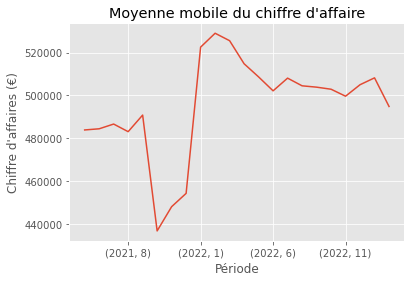

In [61]:
# Decomposition en moyenne mobile:
MovingAverage = ca_mensu.rolling(3).mean()
print(MovingAverage)

# Graphique:
MovingAverage.plot()
color='rocket'
plt.xlabel("Période")
plt.ylabel("Chiffre d'affaires (€)")
plt.title("Moyenne mobile du chiffre d'affaire")

## Zoom :  Baisse du mois d'octobre 2021

In [62]:
#Restriction selon les dates du mois d'octobre
transaction_october = len(Ventes_df[(Ventes_df.date > '2021-09-30') & \
                                                   (Ventes_df.date < '2021-11-01')])
transaction_october

22917

In [63]:
octobre_2021 = Ventes_df.loc[(Ventes_df['year']==2021) & (Ventes_df['month']==10),:]

In [64]:
octobre_2021 = pd.pivot_table(octobre_2021, index = ['day'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});

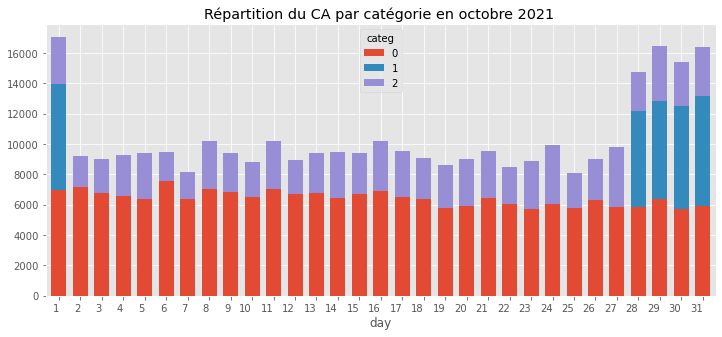

In [65]:
octobre_2021.plot(kind='bar',stacked = True,figsize=(12,5),width = 0.7)
plt.title('Répartition du CA par catégorie en octobre 2021 ')
plt.xticks(rotation =0,ha='right')
plt.show()

> On remarque **l'absence d'achat des produits de la catégorie 1** entre le 2 et le 28 octobre 2021.

In [66]:
len_df_before = len(Ventes_df) # Nombre de lignes avant la suppression du mois d'octobre

# Transactions du mois octobre, toutes catégories
octobre = Ventes_df[(Ventes_df['date']>='2021-10-01') & (Ventes_df['date']<='2021-10-31')]

Ventes_df.drop(octobre.index, inplace=True) # Suppression des données du mois d'octobre

# Pourcentage du dataset écarté
print('Mois d\'octobre = ', round(((len_df_before - len(Ventes_df)) / len_df_before * 100), 1), '% du dataset écarté')

Mois d'octobre =  3.0 % du dataset écarté


____
-----
# 2) Analyse de la variable  produit
-----
##  A) Analyse des prix pratiqués : 

_____


In [67]:
# Autocorrelation
autocor = np.corrcoef(np.array([Ventes_df["price"][:-1], Ventes_df["price"][1:]]))
print(autocor)

[[ 1.         -0.00301215]
 [-0.00301215  1.        ]]


In [68]:
#Calcul de la Mediane des prix produits vendus
Ventes_df['price'].median()

13.99

In [69]:
#Calcul du Mode des prix produits vendus
Ventes_df['price'].mode()

0    15.99
dtype: float64

In [70]:
#Calcul de la Variance des prix produits vendus
round(Ventes_df['price'].var(ddof=0), 2)

336.22

In [71]:
#Calcul de l'écart type des prix produits vendus 
round(Ventes_df['price'].std(ddof=0), 2)

18.34

## B) Mesures de tendance centrale et dispersion de la variable "price" 

In [72]:
#Calcul de la Moyenne des prix produits vendus 
round(Ventes_df['price'].mean(), 2)

17.54

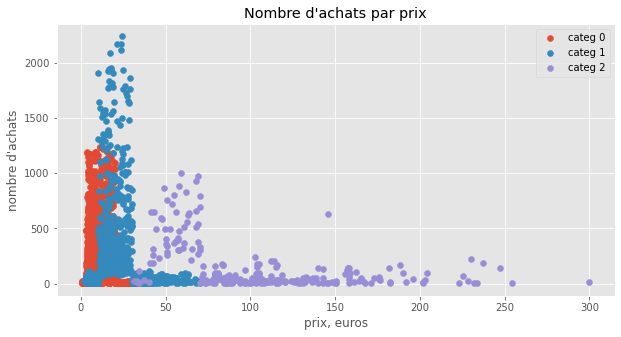

In [73]:
# on va analyser s'il y a un lien entre le prix de livre et le nombre de ventes de ce livre
# on va également colorer les livres selon leur catégorie
categorie_0=Ventes_df[(Ventes_df['categ']==0) & (~Ventes_df['price'].isna())]
categorie_1=Ventes_df[(Ventes_df['categ']==1) & (~Ventes_df['price'].isna())]
categorie_2=Ventes_df[(Ventes_df['categ']==2) & (~Ventes_df['price'].isna())]
cat_0=categorie_0[['id_prod', 'session_id', 'price']].groupby('id_prod').agg({'session_id':'count', 'price': 'first'})
cat_1=categorie_1[['id_prod', 'session_id', 'price']].groupby('id_prod').agg({'session_id':'count', 'price': 'first'})
cat_2=categorie_2[['id_prod', 'session_id', 'price']].groupby('id_prod').agg({'session_id':'count', 'price': 'first'})

plt.figure(figsize=(10,5))
plt.scatter(cat_0.price, cat_0.session_id)
plt.scatter(cat_1.price, cat_1.session_id)
plt.scatter(cat_2.price, cat_2.session_id)
plt.title('Nombre d\'achats par prix')
plt.ylabel('nombre d\'achats')
plt.xlabel('prix, euros')
plt.legend(('categ 0','categ 1', 'categ 2'), numpoints=1, loc='upper right')
plt.show()



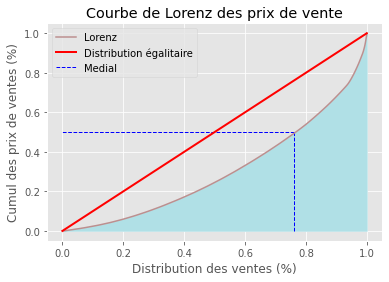

In [74]:
#Courbe de Lorenz sur la variables des prix
price = Ventes_df['price'].values
#Sélection du sous-échantillon de travail que l'on appelle price

#On place les observations dans une variable
lorenz_price = np.cumsum(np.sort(price)) / price.sum()
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations

plt.plot(np.linspace(0,1,len(lorenz_price)), lorenz_price, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_price)) ,lorenz_price , color='powderblue')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des prix de vente')
plt.xlabel("Distribution des ventes (%)")
plt.ylabel("Cumul des prix de ventes (%)")
plt.legend(loc="best")

plt.show()

In [75]:
# on calcule le coefficient de Gini
n=len(price)
AUC=(lorenz_price.sum() - lorenz_price[-1]/2 - lorenz_price[0]/2)/n
S=0.5-AUC
gini=2*S
print(gini)

0.39440369825838817


### Confirmation avec l'indice de Gini = à 0,39
* Cet indicateur quand il est plus proche de 0 que de 1, indique  Que les prix pratiqués ont une tendance à être équitables.

Les prix de livres sont  exponentiellement distribuées.


**Ce n'est pas une égalité totale.**

 ##  C) **Le chiffre d'affaires par produit**

In [76]:
#ca_par_produit afin d'observer avec tous les produits, leur prix, leur catégorie, nombre de ventes et CA
ca_par_produit=Ventes_df.groupby('id_prod').agg({'price': np.sum, 'id_prod': 'count'}).rename(columns={'price': 'chiffre d\'affaires', 'id_prod': 'nombre d\'achats'})

# le top-10 livres selon leur contribution au chiffre d'affaires
display(ca_par_produit.sort_values(by='chiffre d\'affaires', ascending=False).head(10).style.format({'categ': "{:.0f}", 'price':"{:.2f}", 'chiffre d\'affaires': "{:,.2f}"}))

,chiffre d'affaires,nombre d'achats
id_prod,,
2_159,"92,265.68",632
2_135,"67,472.22",978
2_112,"62,840.10",930
2_102,"59,080.86",999
2_209,"55,502.07",793
1_395,"54,095.34",1866
1_369,"53,761.59",2241
2_110,"51,916.50",834
1_414,"51,711.10",2170


In [77]:
# bestsellers ( en terme de fréquences d'achat )
display(ca_par_produit.sort_values(by='nombre d\'achats', ascending=False).head(10).style.format({'categ': "{:.0f}", 'price':"{:.2f}", 'chiffre d\'affaires': "{:,.2f}"}))

,chiffre d'affaires,nombre d'achats
id_prod,,
1_369,"53,761.59",2241
1_417,"45,632.26",2174
1_414,"51,711.10",2170
1_498,"49,521.03",2119
1_425,"35,458.13",2087
1_403,"35,116.48",1952
1_412,"32,334.30",1942
1_406,"47,982.54",1934
1_413,"34,774.67",1933


In [78]:
# TOP ET FLOP des ventes:
nbr_ventes_ref = Ventes_df.groupby(["id_prod"])["session_id"].count()

print("Références les plus vendues")
print(nbr_ventes_ref.nlargest(10))
print("Références les moins vendues")
print(nbr_ventes_ref.nsmallest(10))

Références les plus vendues
id_prod
1_369    2241
1_417    2174
1_414    2170
1_498    2119
1_425    2087
1_403    1952
1_412    1942
1_406    1934
1_413    1933
1_407    1925
Name: session_id, dtype: int64
Références les moins vendues
id_prod
0_1151    1
0_1284    1
0_1498    1
0_1533    1
0_1539    1
0_1595    1
0_1601    1
0_1633    1
0_1683    1
0_1728    1
Name: session_id, dtype: int64


* Nos 10 best sellers appartiennent tous à la catégorie 1 

In [79]:
# on va afficher les produits que nos clients n'achètent pas 
# (les produits qui existent dans le tableau products, mais pas dans le tableau transactions)
produit_non_vendus=Products_df[~Products_df.id_prod.isin(Transactions_df.id_prod.unique().tolist())].copy()
print('Total nombre de produits que l\'on n\'achète jamais :', len(produit_non_vendus))
produit_non_vendus.sort_values('price')

Total nombre de produits que l'on n'achète jamais : 21


,id_prod,price,categ
1530,0_1620,0.80,0
811,0_1014,1.15,0
279,0_1780,1.67,0
2215,0_310,1.94,0
794,0_1119,2.99,0
1505,0_322,2.99,0
1347,0_1645,2.99,0
737,0_1062,20.08,0
3096,0_2308,20.28,0
1031,0_1318,20.92,0


* Tandis que les 21 produits référence produit ci dessous:
>  0_1151  ,0_1284  ,0_1379 ,0_1498 ,0_1539  ,0_1601  , 0_1633  ,0_1683 ,0_1728 ,0_2201 

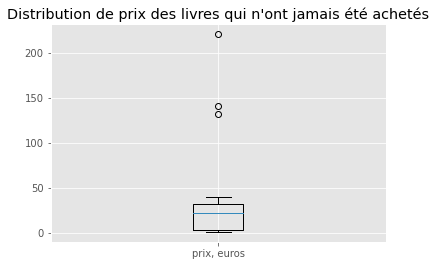

In [80]:
# graphique avec la distribution des prix de ces produits
plt.boxplot(produit_non_vendus['price'])
plt.xticks([1], ['prix, euros'])
plt.title('Distribution de prix des livres qui n\'ont jamais été achetés')
plt.savefig('LaPage2.png', transparent=True)
plt.show()

### Parmi ces  21 références :
*  3 appartienne aux livres de la catégorie 2
 
*  2 aux livres de la catégorie 1
 
*  16 livres en catégorie 0

#### Les prix varient de 0.8 à 221 euros.

> Il faut analyser ces livres plus profondément pour trouver la raison pour laquelle ces livres ne sont pas vendus.


___
# 3 ) Analyse de la répartition par catégorie.
___

In [81]:
# CA par categories:
ca_categ = Ventes_df.groupby(Ventes_df["categ"])["price"].sum()


In [82]:
# Repartition des references parmis les categories:
repartition_categ = Products_df.groupby(["categ"])["id_prod"].count()
print("Répartitions des références par catégories:\n",repartition_categ)

Répartitions des références par catégories:
 categ
0    2308
1     739
2     239
Name: id_prod, dtype: int64


In [83]:
#Représentation des effectifs par catégories de vente(méthode .value_counts())
effectif = Ventes_df['categ'].value_counts()
modalite = effectif.index #l'index de 'effectifs' contient les modalités

tab = pd.DataFrame(modalite, columns = ['categ']) #création du tableau à partir des modalités
tab["n"] = effectif.values
tab["f"] = tab["n"] / len(Ventes_df) #len(df_transactionsv1_products) renvoie la taille de l'échantillon
tab

,categ,n,f
0,0,397466,0.603443
1,1,225845,0.342883
2,2,35353,0.053674


In [84]:
#Fréquences cumulées
tab = tab.sort_values("categ") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
tab

,categ,n,f,F
0,0,397466,0.603443,0.603443
1,1,225845,0.342883,0.946326
2,2,35353,0.053674,1.000000


In [85]:
# Prix moyen par categories:
prix_categ = Products_df.groupby(["categ"])["price"].mean()
print("Prix moyen d'un livre selon sa catégorie:\n",prix_categ)



Prix moyen d'un livre selon sa catégorie:
 categ
0     11.732795
1     25.531421
2    108.354686
Name: price, dtype: float64


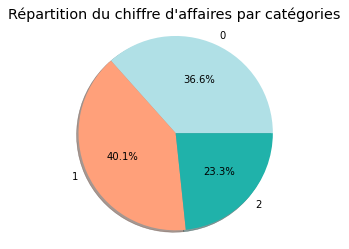

In [86]:
# Graphique:
fig1, ax1 = plt.subplots()
ax1.pie(ca_categ,
        labels=["0","1","2"],
        autopct="%1.1f%%",
        colors=colors,
        shadow=True)
ax1.axis("equal")
plt.title("Répartition du chiffre d'affaires par catégories")
plt.show()

Les catégories 1 et 0 apportent 76,7% du CA. 

 la catégorie 2 tient également une contribution significative à hauteur 23,5%.

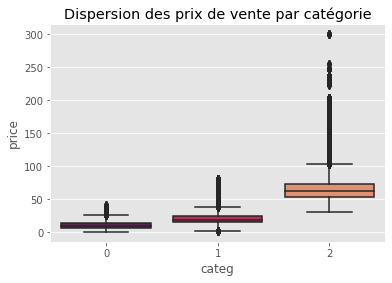

In [87]:
#Autre représentation possible avec Seaborn
sns.boxplot(x = 'categ', y = 'price', data = Ventes_df , palette="rocket")
plt.title('Dispersion des prix de vente par catégorie')
plt.show()

**La distribution des prix au sein de chacune des catégories n'est pas symétrique** 


____ 
* **Les meilleures ventes** sont enregistrés dans la catégorie 1 corresondant à la catégorie de prix moyen-intermédiaire.

* **Les 3 catégories** n'ont pas les mêmes gammes de produits.

* **La catégorie 2** à son prix moyen proche de 60€ avec des outliers jusqu'à 300€.
___

### <font color='Blue'>Test de Normalité </font> 

In [88]:
# on teste l'hypothèse nulle que le prix par catégorie suit une loi normale 
print(st.normaltest(Products_df[Products_df.categ == 0].price))
print(st.normaltest(Products_df[Products_df.categ == 1].price))
print(st.normaltest(Products_df[Products_df.categ == 2].price))

NormaltestResult(statistic=217.7435615987308, pvalue=5.218988787969202e-48)
NormaltestResult(statistic=67.0908230908298, pvalue=2.700305323772996e-15)
NormaltestResult(statistic=31.590909524092964, pvalue=1.3807694122562895e-07)


--------------------------------------------------
Produits de catégorie 0
moyenne:
 10.638751666862083
medianne:
 9.99
mode:
 0    4.99
dtype: float64
nbr elements:
 397466
var:
 24.339402201239366
ect:
 4.9334979680992435
coeff de variation :
 0.4637290278582456
skw:
 0.4221898520371106
kur:
 -0.3868495335938431


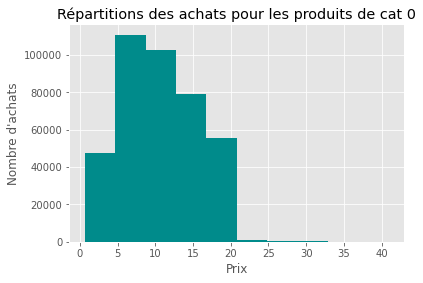

In [89]:
subset_0 = Ventes_df[Ventes_df.categ == 0.0] # Création du sous-échantillon

print("-"*50)
print("Produits de catégorie 0")
print("moyenne:\n",subset_0['price'].mean())
print("medianne:\n",subset_0['price'].median())
print("mode:\n",subset_0['price'].mode())
print("nbr elements:\n",len (subset_0['price']))
print("var:\n",subset_0['price'].var(ddof = 0))
print("ect:\n",subset_0['price'].std(ddof = 0))
print("coeff de variation :\n",subset_0['price'].std(ddof = 0)/subset_0['price'].mean())
print("skw:\n",subset_0['price'].skew())
print("kur:\n",subset_0['price'].kurtosis())

#Creation de l'histogramme correspondant.
subset_0["price"].hist(color = "darkcyan")
plt.xlabel('Prix')
plt.ylabel("Nombre d'achats")
plt.title("Répartitions des achats pour les produits de cat 0")
#J'affiche l'histogramme
plt.show()

In [90]:
#Comptage des produits présents en catégorie 0
len(Products_df[Products_df.categ == 0].groupby('id_prod'))

2308

## pour les 2308 produits de catégorie 0

* **la variance** est égale à 24
* **l'écart type** est égale à 4,9
* **le coefficient de variation** est égal à 0,46
* **la distribution** est étalée à droite (skew > 0, = 0,42)
* **la distribution** est plus applatie que la courbe de Gauss, les observations soint moins concentrées (kur < 0, = -0,38) 

--------------------------------------------------
Produits de catégorie 1
moyenne:
 20.48848564287138
medianne:
 19.08
mode:
 0    15.99
dtype: float64
nbr elements:
 225845
var:
 57.59758709102261
ect:
 7.589307418402724
coeff de variation :
 0.37041817295283086
skw:
 1.7366160403804198
kur:
 8.174631116916267


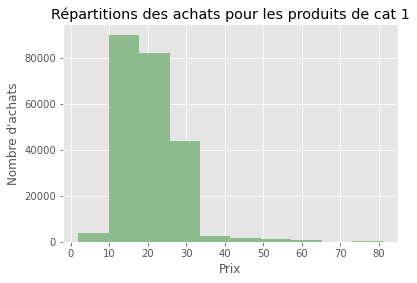

In [91]:
subset_1 = Ventes_df[Ventes_df.categ == 1.0] # Création du sous-échantillon

print("-"*50)
print("Produits de catégorie 1")
print("moyenne:\n",subset_1['price'].mean())
print("medianne:\n",subset_1['price'].median())
print("mode:\n",subset_1['price'].mode())
print("nbr elements:\n",len (subset_1['price']))
print("var:\n",subset_1['price'].var(ddof = 0))
print("ect:\n",subset_1['price'].std(ddof = 0))
print("coeff de variation :\n",subset_1['price'].std(ddof = 0)/subset_1['price'].mean())
print("skw:\n",subset_1['price'].skew())
print("kur:\n",subset_1['price'].kurtosis())


#Creation de l'histogramme correspondant.
subset_1["price"].hist( color= "darkseagreen")
plt.xlabel('Prix')
plt.ylabel("Nombre d'achats")
plt.title("Répartitions des achats pour les produits de cat 1")
#J'affiche l'histogramme
plt.show()

In [92]:
#Comptage des produits présents en catégorie 1
len(Products_df[Products_df.categ == 1].groupby('id_prod'))


739

## pour 739 les produits de catégorie 1.

* **la variance** est égale à 57.5
* **l'écart type** est égale à 7,5
* **le coefficient de variation** est égal à 0.37
* **la distribution** est étalée à droite (skew > 0, = 1,73)
* **la distribution** est moins applatie que la courbe de Gauss, les observations soint plus concentrées (kur > 0, = 8,17)

--------------------------------------------------
Produits de catégorie 0
moyenne:
 76.25120385825402
medianne:
 62.83
mode:
 0    68.99
dtype: float64
nbr elements:
 397466
var:
 1584.5370307176931
ect:
 39.8062436147609
coeff de variation :
 0.522040854446811
skw:
 2.1808935525939925
kur:
 4.802854944093157


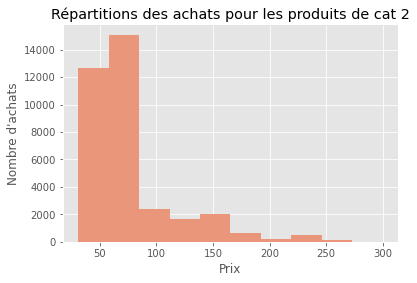

In [93]:
subset_2 = Ventes_df[Ventes_df.categ == 2.0] # Création du sous-échantillon

print("-"*50)
print("Produits de catégorie 0")
print("moyenne:\n",subset_2['price'].mean())
print("medianne:\n",subset_2['price'].median())
print("mode:\n",subset_2['price'].mode())
print("nbr elements:\n",len (subset_0['price']))
print("var:\n",subset_2['price'].var(ddof = 0))
print("ect:\n",subset_2['price'].std(ddof = 0))
print("coeff de variation :\n",subset_2['price'].std(ddof = 0)/subset_2['price'].mean())
print("skw:\n",subset_2['price'].skew())
print("kur:\n",subset_2['price'].kurtosis())


#Creation de l'histogramme correspondant.
subset_2["price"].hist( color ='darksalmon')
plt.xlabel('Prix')
plt.ylabel("Nombre d'achats")
plt.title("Répartitions des achats pour les produits de cat 2")
#J'affiche l'histogramme
plt.show()

In [94]:
#Comptage des produits présents en catégorie 1
len(Products_df[Products_df.categ == 2].groupby('id_prod'))


239

___
### Pour les 239  produits de catégorie 2
____

* **la variance** est égale à 1584
* **l'écart type** est égale à 39
* **le coefficient** de variation est égal à 0,5
* **la distribution** est étalée à droite (skew > 0, = 2,1)
* **la distribution** est moins applatie que la courbe de Gauss, les observations sont plus concentrées (kur > 0, = 4,4)

* **La catégorie 2** ressort avec **moins de quantités vendues** 
* **moins de chiffre d'affaires**
> *L'analyse qui suit nous permettra de comprendre si il y a des corrélations possibles ou non entre ces variables.*

### <font color='Blue'>Test de comparaison</font> 

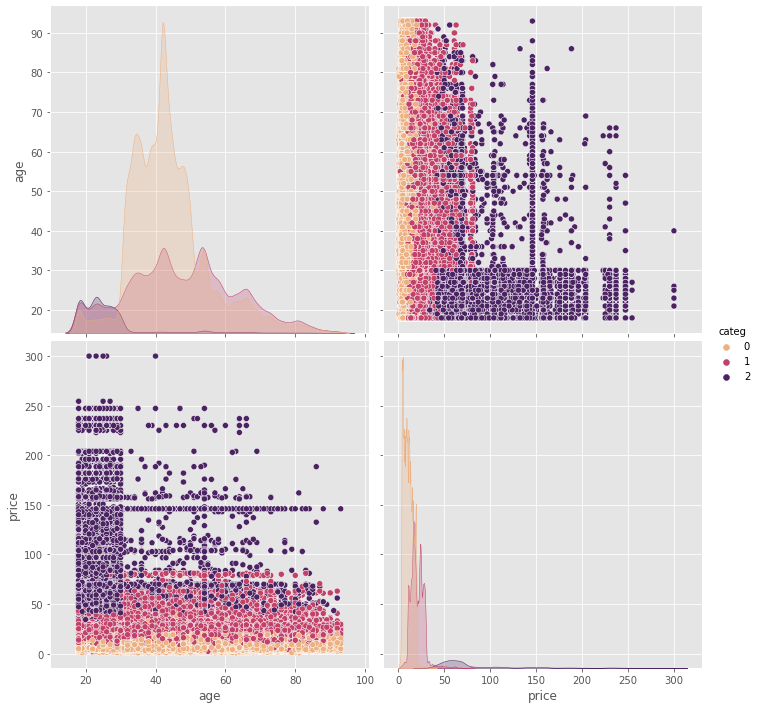

In [95]:
# on va comparer les trois échantillons correspondant aux catégories
sns.pairplot(Ventes_df[['categ', 'age', 'price']], hue='categ', palette='flare', diag_kind='kde', height=5)
plt.show()

> Grace au Graphique nous pouvons observer une **grande variabilité des échantillions** (inter-catégorie) 

In [96]:
# on teste l'hypothèse Ho que l'âge de clients qui achètent des livres de chaque catégorie suit une loi normale 
print(st.normaltest(Ventes_df[Ventes_df['categ']==0]['age']))
print(st.normaltest(Ventes_df[Ventes_df['categ']==1]['age']))
print(st.normaltest(Ventes_df[Ventes_df['categ']==2]['age']))

NormaltestResult(statistic=63629.604465845354, pvalue=0.0)
NormaltestResult(statistic=3872.8588969984467, pvalue=0.0)
NormaltestResult(statistic=21749.608097792247, pvalue=0.0)


> * Le resultat des test de normalité nous renseigne sur les que les  pvalue tout toute inférieur à  0,05%

>* On rejette par conséquent  l'hypothèse que la distribution de ces variable suivent une loi normale * l'hypothèse de normalité au niveau de test étant fixé 5%.


____
----
# 4 ) Analyse du comportement client 
---
___

In [97]:
# Meilleurs clients:
best_client = Ventes_df.groupby(["client_id"])["price"].sum()

print("Clients ayant le plus dépensé")
print(best_client.nlargest(10))

Clients ayant le plus dépensé
client_id
c_1609    313044.92
c_4958    282959.96
c_6714    149934.90
c_3454    111901.13
c_2899      5214.05
c_1570      5166.45
c_3263      5129.89
c_7319      5120.55
c_5263      5006.85
c_8026      4979.40
Name: price, dtype: float64


* c_1609, (homme 41ans) achète plusieurs fois les mêmes livres

> Il peut s'agir d'un revendeur (libraires, bibliothécaires, professeur )  

* c_4958 , c_6714 , c_3454 aussi d'ailleurs.

> Il sera possible de leur  proposer un accompagnement particulier. 
Puisqu'ils n'auront potentiellement pas les mêmes besoins que des clients particuliers. 
(Frais de TVA, Facturation, Etc.)

In [98]:
# Nombre d'achats et montant moyen par client:
nbr_achats_moy = Ventes_df.groupby(["client_id"])["session_id"].count().mean()
montant_achats_moy = Ventes_df.groupby(["client_id"])["price"].sum().mean()

print("Le nombre moyen d'achat par client depuis l'ouverture du site est", round(nbr_achats_moy,2))
print("Le montant moyen d'achat par client depuis l'ouverture du site est", round(montant_achats_moy,2))

Le nombre moyen d'achat par client depuis l'ouverture du site est 76.61
Le montant moyen d'achat par client depuis l'ouverture du site est 1343.51


In [99]:
# Nombre moyen d'achats par sessions:
print("Il y a eu",
      Complet_df["session_id"].nunique(),
      "sessions")

print("Une session aboutie en moyenne à",
      round(Complet_df.groupby(["session_id","client_id"])["id_prod"].count().mean(),2),
      "achats")

Il y a eu 342315 sessions
Une session aboutie en moyenne à 1.98 achats


L'indice de Gini est égal à 0.3944036982583067 la répartition des commandes par rapport aux catégories de produits est plutot égalitaire 


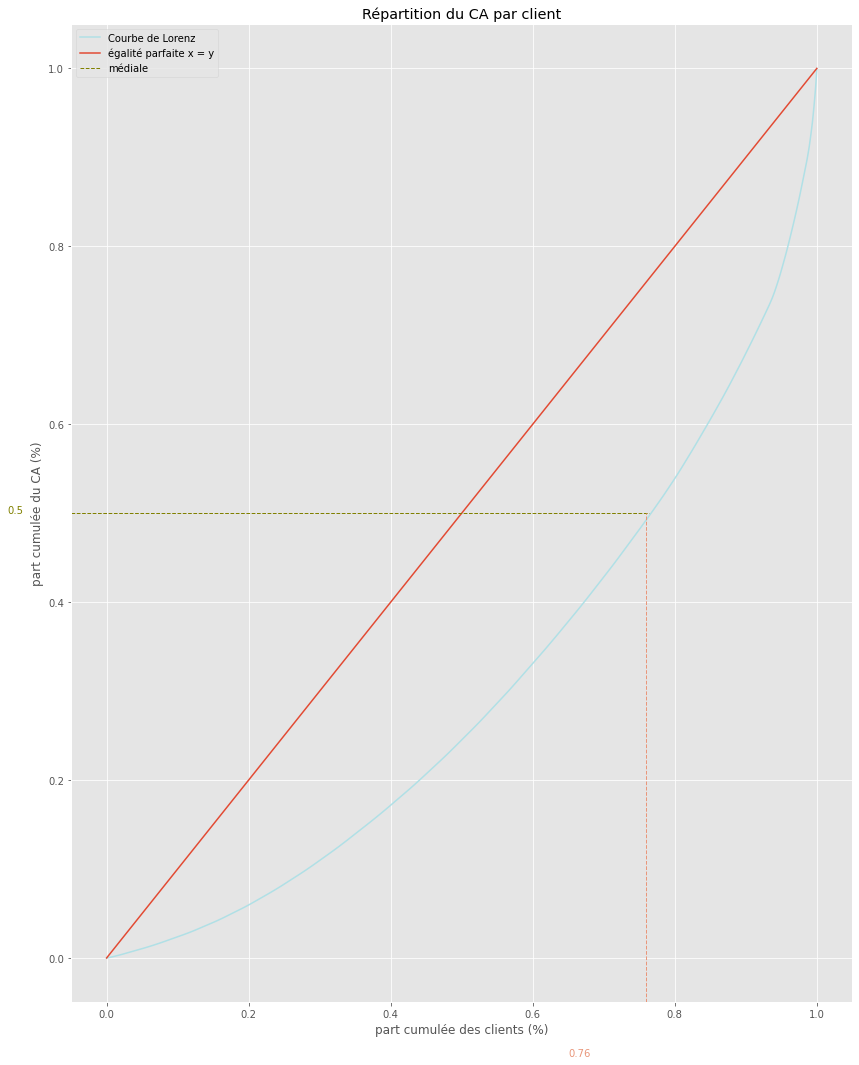

In [100]:
#On mesure la  concentration de la variable price (courbes de Lorenz et indice de Gini)

depenses = Ventes_df[Ventes_df['price'] > 0]
dep = depenses['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()

# La courbe de Lorenz commence à 0
lorenz = np.append([0],lorenz)

# Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n

# surface entre la première bissectrice et le courbe de Lorenz
S = 0.5 - AUC 
gini = 2*S
print("L'indice de Gini est égal à",gini, 'la répartition des commandes par rapport aux catégories de produits est plutot égalitaire ')

#Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
xaxis = np.linspace(0-1/n,1+1/n,n+1)

fig, ax = plt.subplots(figsize=(14, 18))

plt.plot(xaxis,lorenz,drawstyle='steps-post', color='powderblue', label = 'Courbe de Lorenz')
plt.plot(xaxis,xaxis, label ='égalité parfaite x = y')

plt.axhline(y=0.5, xmin=0, xmax=0.74, c='olive', lw=1, linestyle='dashed',label ='médiale')
plt.axvline(x=0.76, ymin=0, ymax=0.5, c='darksalmon', lw=1, linestyle='dashed')
ax.text(-0.14, 0.5, "0.5",color='olive')
ax.text(0.65, -0.11, "0.76",color='darksalmon')


plt.xlabel("part cumulée des clients (%)")
plt.ylabel("part cumulée du CA (%)")
plt.legend()
plt.title('Répartition du CA par client')
plt.show()

> Il y a **342312 sessions**
pour un total de 679 332 transactions**
On observe **plusieurs transactions par sessions.**
En moyenne **une session aboutie sur 1,98 achats.**

___
---
# 5) Analyse de la répartition démographique.
---
___

montant total des achats par genre:
 sex
f    5.714254e+06
m    5.837219e+06
Name: price, dtype: float64
nombre total d'achats par genre:
 sex
f    328389
m    330275
Name: price, dtype: int64
montant moyen des achats par genre:
 sex
f    17.400868
m    17.673815
Name: price, dtype: float64


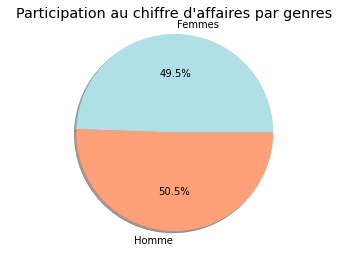

In [101]:
# Depenses par genres:
repartition_achats_genre = Ventes_df.groupby(["sex"])["price"].sum()
print("montant total des achats par genre:\n", repartition_achats_genre)

nbr_achats_genre = Ventes_df.groupby(["sex"])["price"].count()
print("nombre total d'achats par genre:\n", nbr_achats_genre)

moy_achats_genre = Ventes_df.groupby(["sex"])["price"].mean()
print("montant moyen des achats par genre:\n", moy_achats_genre)


# Graphique:
fig3, ax3 = plt.subplots()
ax3.pie(repartition_achats_genre,
        labels=["Femmes","Homme"],
        autopct="%1.1f%%",
          colors=colors,
        shadow=True)
ax3.axis("equal")
plt.title("Participation au chiffre d'affaires par genres")
plt.show()

sex
f    4490
m    4131
Name: client_id, dtype: int64


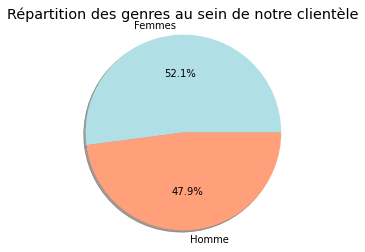

In [102]:
# Repartition des genres parmis nos clients:
repartition_genre = Customers_df.groupby(["sex"])["client_id"].count()
print(repartition_genre)

# Graphique:
fig2, ax2 = plt.subplots()
ax2.pie(repartition_genre,
        labels=["Femmes","Homme"],
        autopct="%1.1f%%",
        colors=colors,
        shadow=True)
ax2.axis("equal")
plt.title("Répartition des genres au sein de notre clientèle")
plt.show()

In [103]:
#Méthode .value_counts() pour avoir une idée rapide de la répartition homme/femme chez les clients
repartition_genre.value_counts()

4131    1
4490    1
Name: client_id, dtype: int64

### Répartition semblable du CA par catégorie de produits entre les hommes et les femmes.

> On peut observer **une égalité conditionnelle** entre les hommes et les femmes **en terme de comportement d'achat par categorie.**

In [104]:
# on calcule le CA et le nombre d'achats par genre
ca_par_sex=Ventes_df.groupby('sex').agg({'client_id': pd.Series.nunique, 'price': np.sum, 'session_id': pd.Series.nunique}).rename(columns={'client_id': 'number_clients_uniques', 'price': 'chiffre d\'affaires', 'session_id': 'number_sessions'})
ca_par_sex['av_ca_per_session']=ca_par_sex['chiffre d\'affaires']/ca_par_sex['number_sessions']
display(ca_par_sex.style.format({'number_clients_uniques': "{:,.0f}", 'chiffre d\'affaires': "{:,.2f}", 'number_sessions': "{:,.0f}", 'av_ca_per_session': "{:.2f}"}))

,number_clients_uniques,chiffre d'affaires,number_sessions,av_ca_per_session
sex,,,,
f,"4,477","5,714,253.79","164,062",34.83
m,"4,121","5,837,219.13","167,179",34.92


### <font color='Blue'>Test de comparaison</font> 

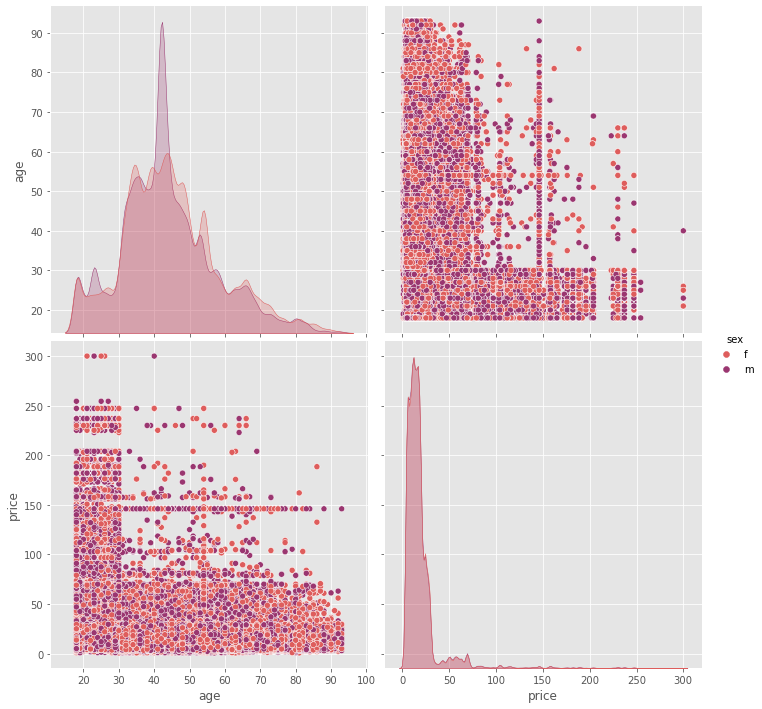

In [105]:
# on va comparer les deux échantillons correspondant aux genres
sns.pairplot(Ventes_df[['sex', 'age', 'price']], hue="sex", palette="flare", diag_kind="kde", height=5)
plt.show()

Les représentations de ces deux sexes se conduisent pareillement. Le nombre de clients uniques, le chiffre d'affaires, le nombre de visites ayant abouti à un achat varient très légèrement.

### <font color='Blue'>Test de normalité </font> 

In [106]:
# on compare 2 variances: H0: les variances du prix d'achat pour les deux sexes sont égales
f=Ventes_df[Ventes_df['sex']=='f']['price']
m=Ventes_df[Ventes_df['sex']=='m']['price']
print('Pour l\'échantillon f nous avons: variance =', round(np.var(f, ddof=1),2), 'moyenne =', round(np.mean(f),2), 'taille =', len(f))
print('Pour l\'échantillon m nous avons: variance =', round(np.var(m, ddof=1),2), 'moyenne =', round(np.mean(m),2), 'taille =', len(m))

Pour l'échantillon f nous avons: variance = 319.77 moyenne = 17.4 taille = 328389
Pour l'échantillon m nous avons: variance = 352.54 moyenne = 17.67 taille = 330275


In [107]:
print(st.normaltest(f))
print(st.normaltest(m))

NormaltestResult(statistic=350438.74260541657, pvalue=0.0)
NormaltestResult(statistic=347147.35484263435, pvalue=0.0)


> * **l'hypothèse que les variable sex suivent une loi de normal est rejeté** le seuil significatif fixé à 5% n'étant pas atteint.
Il n'y a pas les conditions de normalité nescessaire concernant la distribution de la variance des prix intersexes.
Nous pouvons proceder à **un test non-parametrique** afin d'infirmer ce rejet de Ho.

### <font color='Blue'>Mann–Whitney U test </font> 

In [108]:
# test non-parametrique pour tester l'hypothèse selon laquelle les médianes de chacun de deux groupes de données sont proches
st.mannwhitneyu(f, m)

MannwhitneyuResult(statistic=54215822893.5, pvalue=0.43046512105518)

pvalue > 0,05, on ne peut pas rejeter l'hypothèse 0. Les médianes de prix du panier de femmes et d'hommes sont proches.

# Mission 2 Julie  : Analyse Ciblée Client

##### Observation des corrélations.

* **Les corrélations** indiquent si *deux variables* sont **linéairement équivalentes**.

> Afin de  mieux appréhender les ventes enregistrées.
 *on va vérifier si :*

* corrélation **entre le sexe des clients et les catégories de produits achetés** 
* corrélation **entre l'âge des clients et le montant total des achats**
* corrélation **entre l'âge des clients et la fréquence d’achat (nombre d'achats par mois)** 
* corrélation **entre l'âge des clients et la taille du panier moyen (en nombre d’articles)** 
* corrélation **entre l'âge des clients et les catégories de produits achetés**


### Observation des corrélations sur l'ensemble de nos variables numériques

In [109]:
#Utilisation de la méthode .corr()
Ventes_df.corr().head()

,birth,age,price,categ,year,month,day
birth,1.000000,-1.000000,0.208636,0.097142,0.000115,-0.004984,0.005398
age,-1.000000,1.000000,-0.208636,-0.097142,-0.000115,0.004984,-0.005398
price,0.208636,-0.208636,1.000000,0.669636,0.009453,-0.007861,-0.000589
categ,0.097142,-0.097142,0.669636,1.000000,0.018736,-0.005178,-0.005646
year,0.000115,-0.000115,0.009453,0.018736,1.000000,-0.363012,-0.019847


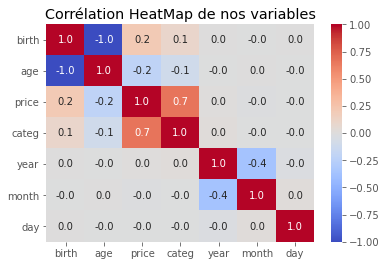

In [110]:
#Méthode .corr() avec par défaut la formule de la corrélation linéaire de Pearson
sns.heatmap(Ventes_df.corr(), annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Corrélation HeatMap de nos variables')
plt.show()

cet  HeatMap renvoie une première image des possibles corrélations linéaires. Par exemple, et sans suprise, les prix produits / catégories sont fortement corrélés. Dans notre contexte cette analyse se révèle trop succincte, d'autres tests doivent-être menés

## 1 ) Corrélation entre le sexe des clients et les catégories de produits achetés 

Ces deux variables sont qualitatives.
Je choisie de réaliser le test du Khi² et de Cramer pour vérifier si ces deux variables sont liées.

In [111]:
# Création de ma table de contingence
X = "sex"
Y = "categ"

cont_1 = Ventes_df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

categ,0,1,2,Total
sex,,,,
f,197385,114258,16746,328389
m,200081,111587,18607,330275
Total,397466,225845,35353,658664


In [112]:
# J'ouvre le module chi2_contingency de la librairie scipy
from scipy.stats import chi2_contingency as chi2_contingency

In [113]:
chi2, p, dof, exp = chi2_contingency(cont_1)

In [114]:
chi2

142.44083074174472

In [115]:
p

3.0601296801209968e-28

Le test de Chi2 est utilisé pour tester l'hypothèse nulle (H0) d'absence de relation entre deux variables catégorielles, ce test vérifie donc l'hypothèse d'indépendance de ces variables.

La valeur de Chi2 est une quantification de cet écart (entre les occurences attendues et celles observées). Plus la valeur sera élevée, plus l'écart entre l'hypothèse nulle et la situation réelle sera grand.

Plus l’occurrence observée est près de l’occurrence attendue, plus la fraction calculée pour chaque cellule est petite et moins l’écart avec H0 est grand.

In [116]:
# Table de contingence pour Chi²:
categ_sex = pd.crosstab(Ventes_df["sex"],Ventes_df["categ"])
print(categ_sex)


# Calcul V de Cramer:
n_cs = len(Ventes_df)
minDim_cs = min(categ_sex.shape)-1

V_cs = np.sqrt((cont_1/n_cs) / minDim_cs)

print("Le V de Cramer vaux:", V_cs)

categ       0       1      2
sex                         
f      197385  114258  16746
m      200081  111587  18607
Le V de Cramer vaux: categ         0         1         2     Total
sex                                          
f      0.547426  0.416496  0.159450  0.706094
m      0.551151  0.411599  0.168076  0.708118
Total  0.776816  0.585563  0.231676  1.000000


* L'hypothèse qui établirait un **lien d'interdépendance des variables catégories achetées et de genre est invalidé.**

Qu'importe le  seuil à 5% (0,05) ou 1% (0,01), la p-value sera ici toujours très inférieure au seuil de significativité.

* **l'hypothèse est rejetée, les catégories des livres achetées ne dépendent donc pas du genre de l'acheteur.**

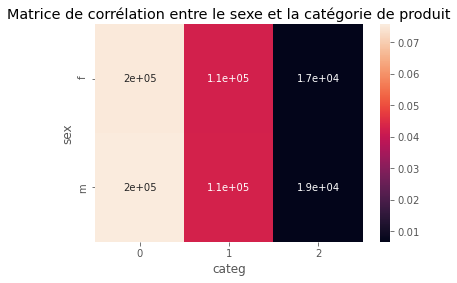

In [117]:
tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(cont_1)
indep = tx.dot(ty) / n

c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le sexe et la catégorie de produit')
plt.show()

>La map nous confirme qu'il n'y a que peu de variations entre genres au sein des catégories, l'achat d'une catégorie en particulier ne dépenderait donc pas du genre de l'acheteur.

L'indice élevé du Chi2 démontre une importance significative entre les occurences théoriques et celles du tableau de contigence. De plus, la comparaison de p-value avec notre seuil de significativité (traditionnellement 5%) expose une valeur inférieure au seuil. L'hypothèse nulle est rejetée en faveur de l’hypothèse alternative, il existe donc un lien entre le sexe des clients et les catégories produits.

## 2 ) Corrélation entre  l'age  et les catégories de produits achetés

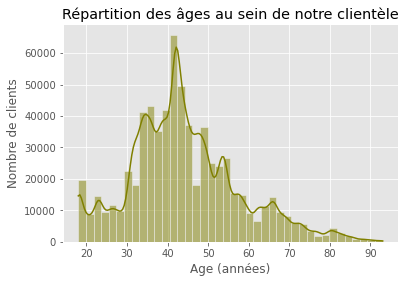

In [118]:
# Repartition des ages parmis nos clients:
sns.histplot(data=Complet_df["age"],
             bins=40,
             kde=True,
            color='olive')
plt.title("Répartition des âges au sein de notre clientèle")
plt.ylabel("Nombre de clients")
plt.xlabel("Age (années)")
plt.show()

In [119]:
# Test de Normalite de la repartition des ages:
print(st.anderson(Customers_df["age"], dist="norm"))

AndersonResult(statistic=54.304839298933075, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


>le test **d'Anderson Darling**  est non paramétrique 
on peut l'utiliser sur de grands échantillons.
**H0 = les données suivent une distribution normale**
alpha 1%
statistique du test d'Anderson (54) > valeure critique (1)

**On rejette H0.
 l'âge ne suit pas une distribution normale avec un risque de 1%.


In [120]:
# Ajout des tranches d'ages:
Ventes_df["age_range"] = pd.cut(x= Ventes_df["age"], bins=[0,20,30,40,50,60,110], include_lowest=False, ordered=True)

# Repartition des achats par tranches d'ages:
repartition_achats_age_range = Ventes_df.groupby(["age_range"])["price"].sum()
print("montant total des achats par tranches d'age:\n", repartition_achats_age_range)

# Nombre d'achats par tranches d'ages:
nbr_achats_age_range = Ventes_df.groupby(["age_range"])["price"].count()
print("nombre total d'achats par tranches d'age:\n",nbr_achats_age_range)

# Motant moyen des achats par tranches d'ages:
moy_achats_age_range = Ventes_df.groupby(["age_range"])["price"].mean()
print("montant moyen des achats par tranches d'age:\n", moy_achats_age_range)

montant total des achats par tranches d'age:
 age_range
(0, 20]      9.437927e+05
(20, 30]     2.264188e+06
(30, 40]     2.523911e+06
(40, 50]     2.849923e+06
(50, 60]     1.585057e+06
(60, 110]    1.384601e+06
Name: price, dtype: float64
nombre total d'achats par tranches d'age:
 age_range
(0, 20]       23496
(20, 30]      54438
(30, 40]     189389
(40, 50]     215117
(50, 60]      94007
(60, 110]     82217
Name: price, dtype: int64
montant moyen des achats par tranches d'age:
 age_range
(0, 20]      40.168228
(20, 30]     41.592053
(30, 40]     13.326600
(40, 50]     13.248245
(50, 60]     16.861057
(60, 110]    16.840807
Name: price, dtype: float64


On prend comme variable age_range afin de faire un test de Khi²

In [121]:
nbr_achats_age_range

age_range
(0, 20]       23496
(20, 30]      54438
(30, 40]     189389
(40, 50]     215117
(50, 60]      94007
(60, 110]     82217
Name: price, dtype: int64

In [122]:
# Creation d'un tableau de contingence
X = "age_range"
Y = "categ"

cont_2 = Ventes_df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_2

categ,0,1,2,Total
age_range,,,,
"(0, 20]",5104,9065,9327,23496
"(20, 30]",10848,20752,22838,54438
"(30, 40]",142919,45749,721,189389
"(40, 50]",162605,51792,720,215117
"(50, 60]",40885,52135,987,94007
"(60, 110]",35105,46352,760,82217
Total,397466,225845,35353,658664


* Les moins de 30 ans dépensent plus en moyenne par achats mais depensent moins que la catégorie des 30-60.
* les 30- 60 ans qui font beaucoup plus d'achat sur le  site et rapportent plus en terme de chiffre brut.
Il serait intéressant de cibler pour les prochaines campagnes marketing les moins de 30Ans.

In [123]:
chi2_2, p_2, dof, exp = chi2_contingency(cont_2)

In [124]:
chi2_2

293783.62176542584

In [125]:
p_2

0.0

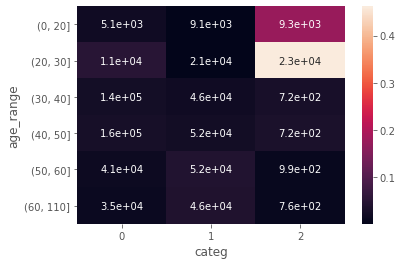

In [126]:
tx = cont_2.loc[:,["Total"]]
ty = cont_2.loc[["Total"],:]
n = len(Ventes_df)
indep = tx.dot(ty) / n

c = cont_2.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

>**Il y a une forte corrélation** entre les personnes âgés de moins de 30 ans pour la catégorie 2 des produits.
**La corrélation linéaire entre l’âge des clients et le montant total des achats est significative et négative.** Plus la personne est âgée, moins elle va dépenser de l'argent.

 ## 3 ) Corrélation entre l'âge des clients et la fréquence d’achat. 

> Dans ce cas de figure, les variables sont  qualitatives et quantitatives. 
On peut réaliser une analyse de la variance (ANOVA) en test de corrélation.

In [127]:
# On crée NBR achat ,Lien entre l'age et la taille du panier:
nbr_achats_age = Ventes_df.groupby(["age"])["session_id"].count()

# Correlation entre l'age et le montant total des achats:
print("Corrélation de Speraman:", st.spearmanr(nbr_achats_age.index,nbr_achats_age.values))


Corrélation de Speraman: SpearmanrResult(correlation=-0.6831168831168831, pvalue=1.0581532184967865e-11)


Corrélation confirmée par le coefficient de Pearson, il existe bien un lien entre l'âge des clients et leurs fréquences d'achat. Il semblerait que des groupes de clients se formalisent sur cette corrélation négative.

Text(0.5, 1.0, "Nombre d'achats selon l'âge")

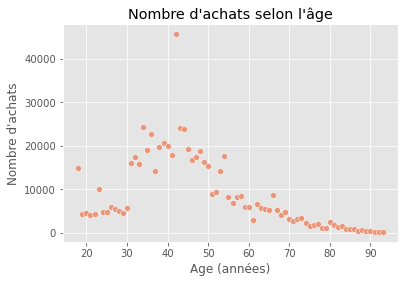

In [128]:
# Graphique:
sns.scatterplot(data= nbr_achats_age, cmap='Set2', color= "darksalmon" )
plt.ylabel("Nombre d'achats")
plt.xlabel("Age (années)")
plt.title("Nombre d'achats selon l'âge")

In [129]:
# Pour calculer la fréquence d'achat mensuelle par client
def frequence(x):
    d = {}
    d["frequence"] = (x['session_id'].count()/ x['client_id'].value_counts().count())
    return pd.Series(d, index=["frequence"])        

In [130]:
# On les regroupe par période et par tranche d'âge
df_age_frequence = Ventes_df.groupby(['year','age_range']).apply(frequence)

In [131]:
# regroupement par période et par tranche d'âge
df_age_frequence = Ventes_df.groupby(['year','age_range']).apply(frequence)

In [132]:
df_age_frequence

frequence
year age_range           
2021 (0, 20]    12.352210
     (20, 30]   13.660118
     (30, 40]   45.253188
     (40, 50]   49.607935
     (50, 60]   25.835344
     (60, 110]  20.609173
2022 (0, 20]    17.422378
     (20, 30]   19.148148
     (30, 40]   60.452773
     (40, 50]   65.748248
     (50, 60]   35.510669
     (60, 110]  28.254557
2023 (0, 20]     4.062016
     (20, 30]    4.268450
     (30, 40]   10.569885
     (40, 50]   11.577279
     (50, 60]    6.494924
     (60, 110]   5.286697

In [133]:
df_age_frequence = df_age_frequence.reset_index()

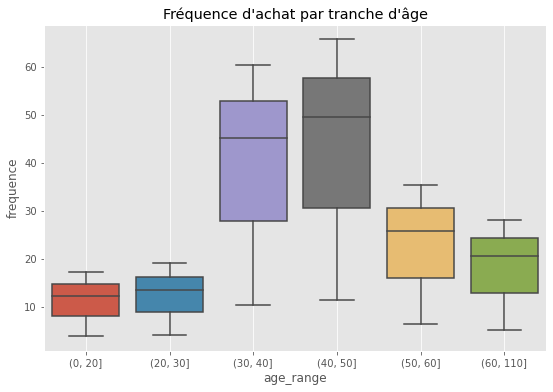

In [134]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='age_range',y='frequence',data=df_age_frequence, showfliers=True)
plt.title('Fréquence d\'achat par tranche d\'âge')
plt.grid()
plt.show()

In [135]:
lm = ols('frequence ~ age_range', data = df_age_frequence).fit()
table = sm.stats.anova_lm(lm)

In [136]:
table

,df,sum_sq,mean_sq,F,PR(>F)
age_range,5.0,2662.400159,532.480032,1.695408,0.21014
Residual,12.0,3768.862053,314.071838,NaN,NaN


In [137]:
lm.summary()

/Users/rawmancerecord/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              frequence   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     1.695
Date:                Thu, 17 Nov 2022   Prob (F-statistic):              0.210
Time:                        04:43:20   Log-Likelihood:                -73.638
No. Observations:                  18   AIC:                             159.3
Df Residuals:                      12   BIC:                             164.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         11.2789     10.232      1.102      0.292     -11.014      33.572
age_range[T.Interval(20, 30, closed='right')]      1.0800     14.470      0.075      0.942     -30.447      32.607
age_range[T.Interval(30, 40, closed='right')]     27.4797     14.470      1.899      0.082      -4.048      59.007
age_range[T.Interval(40, 50, closed='right')]     31.0323     14.470      2.145      0.053      -0.495      62.560
age_range[T.Interval(50, 60, closed='right')]     11.3348     14.470      0.783      0.449     -20.193      42.862
age_range[T.Interval(60, 110, closed='right')]     6.7713     14.470      0.468      0.648     -24.756      38.299
==============================================================================
Omnibus:                        1.569   Durbin-Watson:                   0.356
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.008
Skew:                          -0.569   Prob(JB):                        0.604
Kurtosis:                       2.781   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Avec un R_squared de 0.414, on peut dire qu'il existe à priori une relation entre l'âge et la fréquence d'achats.
Avec un p-value inférieure systématiquement  à 0.05%, on peut rejeter l'hypothèse H0.

## 4 ) Corrélation entre l'âge des clients et la taille du panier moyen.


In [138]:
#Calcul du panier moyen mensuel
def panier_moyen(x):
    d = {}
    d["panier"] = (x['price'].sum()/ x['session_id'].count())
    return pd.Series(d, index=["panier"])

In [139]:
# On regroupe par période et par tranche d'âge
df_age_panier = Ventes_df.groupby(['year','age_range']).apply(panier_moyen)

In [140]:
df_age_panier =  df_age_panier.reset_index()

In [141]:
df_age_panier

,year,age_range,panier
0,2021,"(0, 20]",40.414446
1,2021,"(20, 30]",41.127236
2,2021,"(30, 40]",13.237227
3,2021,"(40, 50]",13.161170
4,2021,"(50, 60]",16.757310
5,2021,"(60, 110]",16.683955
6,2022,"(0, 20]",39.867818
7,2022,"(20, 30]",41.720846
8,2022,"(30, 40]",13.391748
9,2022,"(40, 50]",13.302492


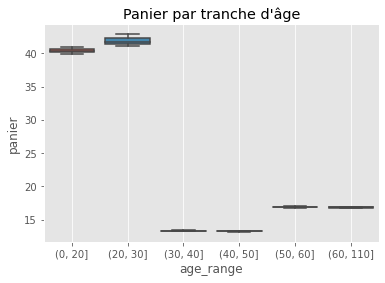

In [142]:
fig = plt.figure()
sns.boxplot(x='age_range',y='panier',data=df_age_panier, showfliers=True)
plt.title('Panier par tranche d\'âge')
plt.grid()
plt.show()

In [143]:
lm_1 = ols('panier ~ age_range', data = df_age_panier).fit()
import statsmodels.api; 
table_1 = sm.stats.anova_lm(lm_1)

In [144]:
table_1

,df,sum_sq,mean_sq,F,PR(>F)
age_range,5.0,2760.134934,552.026987,2955.947531,4.175847e-18
Residual,12.0,2.241015,0.186751,NaN,NaN


In [145]:
lm_1.summary()

/Users/rawmancerecord/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 panier   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2956.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           4.18e-18
Time:                        04:43:21   Log-Likelihood:                -6.7899
No. Observations:                  18   AIC:                             25.58
Df Residuals:                      12   BIC:                             30.92
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         40.3951      0.250    161.904      0.000      39.852      40.939
age_range[T.Interval(20, 30, closed='right')]      1.5148      0.353      4.293      0.001       0.746       2.284
age_range[T.Interval(30, 40, closed='right')]    -27.0724      0.353    -76.726      0.000     -27.841     -26.304
age_range[T.Interval(40, 50, closed='right')]    -27.1331      0.353    -76.898      0.000     -27.902     -26.364
age_range[T.Interval(50, 60, closed='right')]    -23.4897      0.353    -66.572      0.000     -24.258     -22.721
age_range[T.Interval(60, 110, closed='right')]   -23.5467      0.353    -66.734      0.000     -24.316     -22.778
==============================================================================
Omnibus:                        6.086   Durbin-Watson:                   1.235
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                4.019
Skew:                           0.520   Prob(JB):                        0.134
Kurtosis:                       5.068   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 R_squared = 0.999
**le p-value est inférieur à 0.05 %**, 
* on rejete l'hypothèse H0


In [146]:
# Correlation entre l'age et le montant total des achats:
print("Corrélation de Spearman:", st.spearmanr(df_age_panier.index, df_age_panier.values))



Corrélation de Spearman: SpearmanrResult(correlation=array([[ 1.        ,  0.94426737,  0.32917948,  0.05263158],
       [ 0.94426737,  1.        ,  0.        ,  0.20983719],
       [ 0.32917948,  0.        ,  1.        , -0.44204102],
       [ 0.05263158,  0.20983719, -0.44204102,  1.        ]]), pvalue=array([[0.00000000e+000, 3.92679368e-009, 1.82248432e-001,
        8.35690432e-001],
       [3.92679368e-009, 0.00000000e+000, 1.00000000e+000,
        4.03315469e-001],
       [1.82248432e-001, 1.00000000e+000, 2.97071087e-124,
        6.62499202e-002],
       [8.35690432e-001, 4.03315469e-001, 6.62499202e-002,
        0.00000000e+000]]))


Le test de corrélation démontre un certain lien entre l'âge du client et le panier moyen. Par exemple, sur les individus de plus de 50 ans, le panier moyen reste faible. Il existe également un lien sur les individus de 18 à 30 ans et de 30 à 50 ans. La linéarité de la corrélation existe mais selon des corpus de clients visiblement distincts, par tranches d'âges.

### Hypothèse H0 : On suppose les variables âge et montant des achats sont indépendantes.
P value =  < 5%
On rejette donc l'hypothèse. Les deux variables sont corrélées
On peut émettre l'hypothèse que plus les consommateurs sont agés plus le montant total de leur achat est faible. le  Par conséquent, on peut affirmer que plus les consommateurs sont agés plus le montant total de leur achat est faible.(forte correlation)

# 5 ) Corrélation entre l'âge des clients et les catégories de produits achetés 

>* Afin de faire un test de Khi²
on analyse la variable de la colonne age_range 

Il est nécessaire de procéder par un découpage en classes (discrétisation).
Le but est de pouvoir réduire nos individus "âges" par classes, de manière à pouvoir interpréter plus facilement les résultats.

>Comment choisir le nombre de classes?

*Avec par exemple la formule de Sturges-Huntsberger : k = 1 + 3.33*log(N,base=10)
ou encore Brooks-Carruthers : k = 5*log(N,base=10)

In [147]:
import math as mth

In [148]:
#N est le nombre d'observations, ici représentées par les valeurs transactionnelles par âge et par catégorie
len(Ventes_df.groupby(['age', 'categ']).count().reset_index())

228

In [149]:
#Formule de Huntsberger : 1 + 3,3*log10(N)
1 + ((10/3) * mth.log10(228))

8.859782823334847

In [150]:
#Formule de Brooks-Carruthers : 5*log10(N)
5 * mth.log10(227)

11.780129285965613

Dans notre contexte, nous pouvons retenir un nombre de classes de 9.

In [161]:
#Méthode .groupby() pour agréger les données selon l'âge et la catégorie
age_categ = Ventes_df.groupby(['age', 'categ']).count().reset_index()
age_categ = age_categ[['age', 'categ', 'session_id']]
age_categ.head()

,age,categ,session_id
0,18,0,3284
1,18,1,5682
2,18,2,5815
3,19,0,850
4,19,1,1667


In [162]:
df_age_categ = Ventes_df[['age_range','categ']]

In [163]:
#Méthode .cut() pour créer les 9 groupes d'âges, une segmentation des individus 'age'
age_categ['age']= pd.cut(age_categ['age'], 9)
age_categ = age_categ.groupby(['age','categ']).sum().reset_index()
age_categ.head(10)

,age,categ,session_id
0,"(17.925, 26.333]",0,11512
1,"(17.925, 26.333]",1,21791
2,"(17.925, 26.333]",2,23927
3,"(26.333, 34.667]",0,60148
4,"(26.333, 34.667]",1,25433
5,"(26.333, 34.667]",2,8551
6,"(34.667, 43.0]",0,153672
7,"(34.667, 43.0]",1,49050
8,"(34.667, 43.0]",2,690
9,"(43.0, 51.333]",0,99937


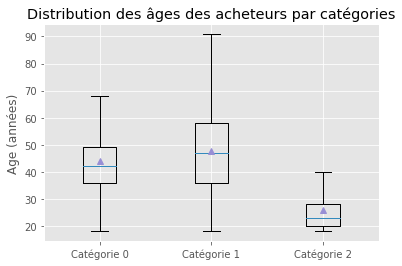

In [165]:
# Categories les plus achetees par age:
categ = Ventes_df["categ"].unique()
categ_age = {categ: Ventes_df.loc[Ventes_df["categ"]==categ, "age"] for categ in categ}

# Graphique:
plt.boxplot([
    categ_age[0],
    categ_age[1],
    categ_age[2]]
    ,labels=["Catégorie 0", "Catégorie 1", "Catégorie 2"],showmeans=True, showfliers=False)
plt.ylabel("Age (années)")
plt.title("Distribution des âges des acheteurs par catégories")
plt.show()

In [166]:
# Création du tableau de contingence
X = "age_range"
Y = "categ"

cont_2 = df_age_categ[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_2

categ,0,1,2,Total
age_range,,,,
"(0, 20]",5104,9065,9327,23496
"(20, 30]",10848,20752,22838,54438
"(30, 40]",142919,45749,721,189389
"(40, 50]",162605,51792,720,215117
"(50, 60]",40885,52135,987,94007
"(60, 110]",35105,46352,760,82217
Total,397466,225845,35353,658664


In [167]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

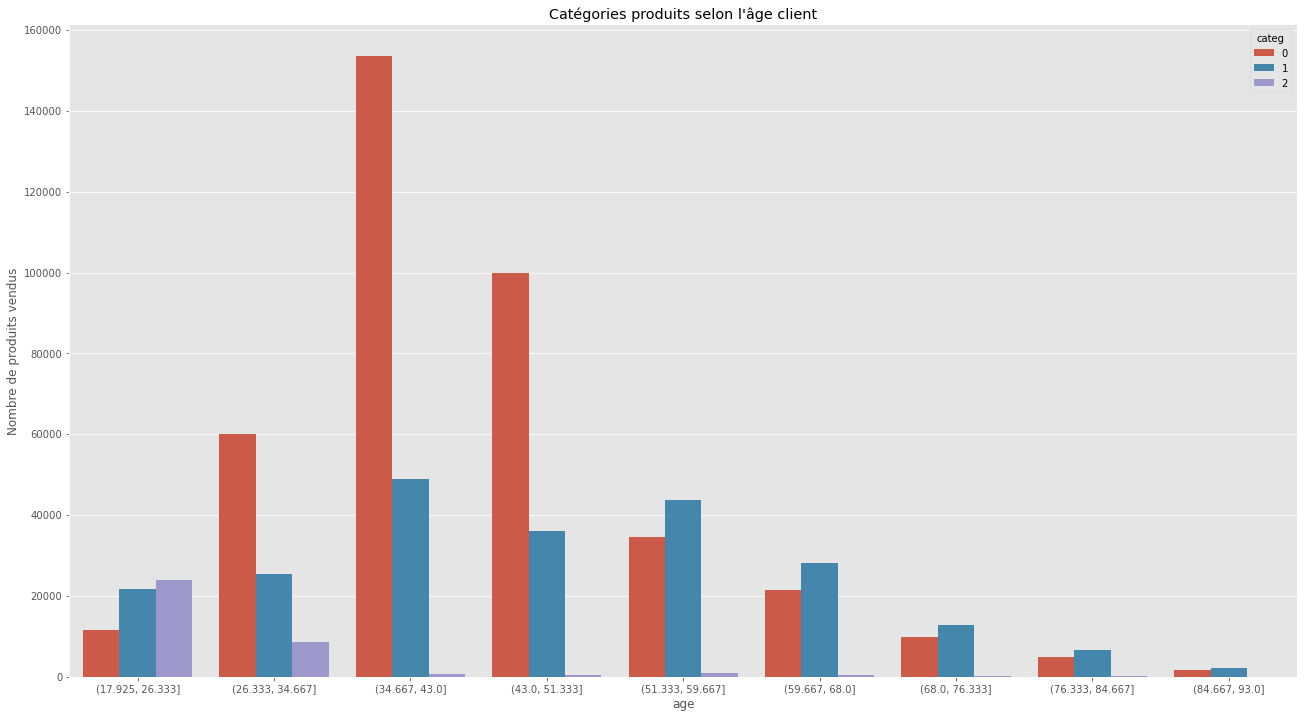

In [174]:
#Visualisation rapide avec une BarPlot Seaborn
fig, ax = plt.subplots(figsize=(22, 12))
sns.barplot(x="age", y="session_id",hue="categ", data=age_categ)

ax.set_xlabel('age')
ax.set_ylabel('Nombre de produits vendus')
ax.set_title('Catégories produits selon l\'âge client')
plt.show()

In [176]:
#Coefficient de corrélation eta carré
X = "categ" #qualitative
Y = "age" #quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT


In [177]:
round(eta_squared(age_categ.age, age_categ.session_id), 2)

0.35

Le rapport de corrélation est proche de 0.35, ce qui précise le précédent graphique dans lequel une certaine corrélation entre les catégories et l'âge client. Il est perceptible de voir le lien que peut avoir une catégorie en fonction d'une tranche d'âges, avec par exemple un fort succès de la catégorie 0 pour les 34 / 44 ans, ou à l'inverse une clientèle plus âgée n'adhère quasiment pas à cette catégorie, etc..

In [182]:
chi2_2

293783.62176542584

In [183]:
p_2

0.0

In [184]:
chi2_2, p_2, dof, exp = chi2_contingency(cont_2)

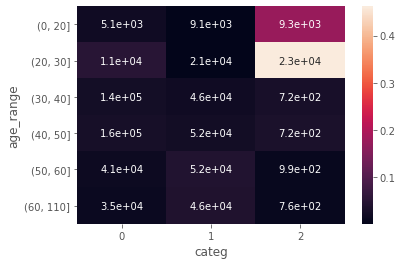

In [185]:
tx = cont_2.loc[:,["Total"]]
ty = cont_2.loc[["Total"],:]
n = len(df_age_categ)
indep = tx.dot(ty) / n

c = cont_2.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

Une forte Corrélation mis en avant sur le heatmap.
Concernant  les personnes âgés de moins de 30ans pour la catégorie 2  produits.
  

In [186]:
# Lien entre age et categorie achetees:
print(type(categ_age[0].values))
print(st.kruskal(categ_age[0], categ_age[1], categ_age[2]))

<class 'numpy.ndarray'>
KruskalResult(statistic=76949.8783255288, pvalue=0.0)


> Le test de **Kruskal Wallis, est non paramétrique, les groupes doivent contenir plus de cinq individus.** 

* p-value < 0,01

**On rejette l'hypothèse nulle selon laquelle il n'y aurait pas de différence entre l'âge et la catégorie.**


# Probabilité conditionnelle
---

In [188]:
# Calcul du nombre de clients
client_total = Ventes_df.client_id.nunique();
print(client_total)

8598


In [191]:
client_2_159 = Ventes_df.loc[Ventes_df['id_prod']=='2_159',]

In [192]:
client_2_159.client_id.nunique()

514

In [194]:
client_0_525 = Ventes_df.loc[Ventes_df['id_prod']=='0_525',]

In [195]:
client_0_525.client_id.nunique()

450

In [202]:
# Calcul de la probabilité qu'un client achète l'article 2_159 :
p_2_159 = 514/8598
print(p_2_159*100)

5.978134449872064


In [204]:
# Calcul de la probabilité qu'un client achète l'article 0_525 :
p_0_525 = 450/8598
print(p_0_525*100)

5.2337752965806


In [205]:
# Calcul de la probabilité qu'un client qui a acheté l'article 2_159 achète l'article 0_525 : 
p_2_articles = p_0_525/ p_2_159*100
print(p_2_articles)

87.54863813229571


In [206]:
# Il est aussi possible de trouver cette propabilité en divisant le nombre de personnes qui ont acheté l'article 0_525
# par le nombre de personnes qui ont acheté l'article 2_159:

455/526*100

86.50190114068441

la Probabilité pour un client d’acheter la référence 0_525 sachant qu’il a acheté la référence 2_159 (*une probabilité conditionnelle est la probabilité de B sachant A. P(B|A) =P(A∩B) /P(A)*)


In [200]:
# Calcul des probabilites de base:
achat_2_159 = Ventes_df.loc[(Ventes_df["id_prod"] == "2_159"),"session_id"]
achat_0_525 = Ventes_df.loc[(Ventes_df["id_prod"] == "0_525"),"session_id"]

p_achat_2_159 = achat_2_159.count()/ventes_tot
p_achat_0_525 = achat_0_525.count()/ventes_tot
p_achat_2_159n_achat_0_525 = len(set(achat_2_159).intersection(set(achat_0_525)))/ventes_tot

print("P(A)=",p_achat_2_159)
print("P(B)=",p_achat_0_525)
print("P(A∩B)=",p_achat_2_159n_achat_0_525)

# L'achat des deux references est-il independant?
if p_achat_2_159n_achat_0_525==p_achat_2_159*p_achat_0_525:
    print("Les évenements sont indépendants")
else:
    print("Les évenements ne sont pas indépendants")

# Probabilite pour un client d’acheter la reference 0_525 sachants qu’il a achete la reference 2_159:
print("P(B|A)=", p_achat_2_159n_achat_0_525/p_achat_2_159)

P(A)= 0.0009303256728668751
P(B)= 0.0007198247690378195
P(A∩B)= 0.0007183527347453087
Les évenements ne sont pas indépendants
P(B|A)= 0.7721518987341772


P(A∩B) =/= P(A) x P(B), les deux achats ne sont donc pas indépendants 

(on remarque  en comparant le nombre d'achats de 0_525 seul face au nombre d'achats de 0_525 avec 2_159). 
Que la probabilité pour un client d'acheter 0_525 sachant qu'il a acheté 2_519 est forte (supérieure à 0,77).

### Conclusion ¶

###### Le chiffre d'affaires total est de 11855936.469999999 €
pour un total de 679332 ventes.
Le chiffre d'affaires s’est stabilisé au niveau de 500,000 euros par mois.
Il a y eu un incidentconcernant les données en octobre 2021 
Erreur du système ou  absence de ventes est liée à une rupture du stock.
Il n'y a pas d'explication visible à une baisse du CA.


##### Les ventes sont uniformément réparties dans le temps

Les catégories 1 et 0 apportent 76,7% du CA. 

 la catégorie 2 tient également une contribution significative à hauteur 23,5%.
 
Les livres que l'on achète plus souvent sont ceux qui coûtent moins cher et vice versa. 

Les plus populaires sont les livres des catégories 0 et 1  coûtant 0-25 euros.  les livres de la catégorie 2 sont plus chers

Les prix des livres de la boutique sont exponentiellement distribuées : la plupart de livres que l'on a sur le site web coûtent 0-25 euros, les livres chers ne sont achetés qu'exceptionnellement. Le top-10 livres selon leur contribution au chiffre d'affaires.les bestsellers sont de la catégorie 1 avec le prix 16-25 euros.

##### Les livres de la catégorie 2 ne sont achetés que par les gens ayant 17-29 ans.

##### En 2 ans 679,332 livres ventes de livres.

Nous avons 3266 livres au total.
Les prix varient de 0.8 à 221 euros.

Nos clients
Nous avons 8,600 clients ayant acheté quelque chose depuis 2 ans uniques et 23 clients qui n'ont jamais acheté de livres sur notre site web. Je peut supposer que les derniers préfèrent acheter des livres à une librairie physique. Ces clients sont d'âges différents, donc il est difficile de voir une tendance. Peut-être ces clients ne savent pas que notre librairie a ouvert un site de vente en ligne (dans ce cas il faut les contacter par e-mail, si on a leurs adresses mails), ou c'est aussi possible que ces clients ont deux comptes et n'en utilise qu'un.

Le CA n’est pas distribué dans une manière égalitaire entre nos clients : 10% de tous les clients apporte 30% du CA. Des client fidèles qui ont acheté plusieurs milliers de livres dans notre magasin.


Les représentatives de deux sexes se conduisent pareillement. Le nombre de clients uniques, le chiffre d'affaires, le nombre de visites ayant abouti à un achat varient très légèrement. Les médianes de prix du panier de femmes et d'hommes sont proches. Il n'y a pas de lien visible entre le genre d'un client et les catégories des livres qu'il achète. La répartition par catégorie est la même pour les hommes et les femmes.

Concernant l’âge de nos clients, les clients ayant 19 ans sont les plus nombreux et même surreprésentés. Par contre, les gens ayant 70 ans et plus sont sous-représentés. 
Ce qui pourrait être expliqué par plusieurs facteurs 
La corrélation linéaire entre l’âge des clients et le montant total des achats est significative et négative. Plus la personne est âgée, moins elle vas dépenser de l'argent. Pourtant, il y a une autre tendance plus importante : les gens gardent leurs habitudes au fil du temps. C'est-à-dire, le prix du panier dépend plus d'année de naissance que d'âge actuel.

Les femmes et les hommes sont représentés également dans chaque tranche d'ages. Les jeunes  moins nombreux, car la fourchette d'âge est deux fois plus petite que pour la tranche de 30-49 ans.
Les gens de 30-49 ans achètent plus souvent et plus de livres par session.

On pourrait collecter la durée des sessions, plus d'informations sur les clients (catégorie socio-professionnelle, zone géographique, date de création de compte),ainsi que sur les produits (catégories plus détaillées, date de sortie de l'ouvrage par exemple). 
Il faudrait également comparer le comportement en ligne et hors ligne, en particulier pour les clients utilisant les deux modes d'achats.

# En Bref 
----
### catégories > qualitative
----
### tranches d'ages > qualitative ordinale
----
### ages > quantitative continue
----
### CA> quantitative continue
----
### temps > année, mois, jours > quantitative continue
----
### genre > qualitative binaire
----
#### fréquence d'achat > quantitative discrete
----
### panier moyen > quantitative continue
----